In [1]:
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import os
import csv
import seaborn
import statsmodels.formula.api as smf
import scipy.stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
weather = pd.read_csv('../Final_Data/London_weather_data_2011_2014.csv', parse_dates=[0], infer_datetime_format=True)
weather.iloc[:,1:].convert_objects(convert_numeric=True)
weather.columns

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Index([u'Unnamed: 0', u'Datetime', u'Dew_Point_F', u'Humidity',
       u'Temperature_F', u'Wind_Speed_MPH'],
      dtype='object')

In [3]:
weather.index = pd.DatetimeIndex(weather.Datetime)

In [4]:
weather.head()

Unnamed: 0             Datetime  Dew_Point_F  Humidity  \
2011-11-01 01:00:00          0  2011-11-01 01:00:00         51.8      88.0   
2011-11-01 02:00:00          1  2011-11-01 02:00:00         53.6      94.0   
2011-11-01 03:00:00          2  2011-11-01 03:00:00         53.6      88.0   
2011-11-01 04:00:00          3  2011-11-01 04:00:00         53.6      88.0   
2011-11-01 05:00:00          4  2011-11-01 05:00:00         53.6      88.0   

                     Temperature_F  Wind_Speed_MPH  
2011-11-01 01:00:00           55.4             6.9  
2011-11-01 02:00:00           55.4             8.1  
2011-11-01 03:00:00           57.2             9.2  
2011-11-01 04:00:00           57.2             9.2  
2011-11-01 05:00:00           57.2             8.1

In [5]:
# slicing out 2012 data
weather2012 = weather[weather.index.year == 2012]

In [30]:
weather2012.Temperature_F.max()

86.0

In [6]:
weather2012.head()

Unnamed: 0             Datetime  Dew_Point_F  Humidity  \
2012-01-01 00:00:00       1460  2012-01-01 00:00:00         50.0      88.0   
2012-01-01 01:00:00       1461  2012-01-01 01:00:00         50.0      88.0   
2012-01-01 02:00:00       1462  2012-01-01 02:00:00         51.8      94.0   
2012-01-01 03:00:00       1463  2012-01-01 03:00:00         51.0      92.0   
2012-01-01 04:00:00       1464  2012-01-01 04:00:00         50.0      88.0   

                     Temperature_F  Wind_Speed_MPH  
2012-01-01 00:00:00           53.6            13.8  
2012-01-01 01:00:00           53.6            15.0  
2012-01-01 02:00:00           53.6            13.8  
2012-01-01 03:00:00           53.0            13.8  
2012-01-01 04:00:00           53.6            10.4

In [7]:
energy2012 = pd.read_csv('../Final_Data/energy_final_2012.csv', parse_dates=[0], infer_datetime_format=True)
energy2012.iloc[:,1:].convert_objects(convert_numeric=True)
energy2012.columns

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Index([u'Unnamed: 0', u'DateTime', u'Adversity', u'Affluent', u'Comfortable',
       u'Overall'],
      dtype='object')

In [9]:
energy2012.index = pd.DatetimeIndex(energy2012.DateTime)

In [10]:
energy2012.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
energy2012.columns = [['Datetime', 'Low_Income', 'High_Income', 'Middle_Income', 'Overall']]

In [12]:
energy2012.head()

Datetime  Low_Income  High_Income  \
2012-01-01 00:00:00  2012-01-01 00:00:00    0.221192     0.268072   
2012-01-01 01:00:00  2012-01-01 01:00:00    0.616456     0.633311   
2012-01-01 02:00:00  2012-01-01 02:00:00    0.483976     0.570036   
2012-01-01 03:00:00  2012-01-01 03:00:00    0.375616     0.489018   
2012-01-01 04:00:00  2012-01-01 04:00:00    0.324936     0.376808   

                     Middle_Income   Overall  
2012-01-01 00:00:00       0.190114  0.231749  
2012-01-01 01:00:00       0.355447  0.550101  
2012-01-01 02:00:00       0.296605  0.466764  
2012-01-01 03:00:00       0.236228  0.383123  
2012-01-01 04:00:00       0.206053  0.312892

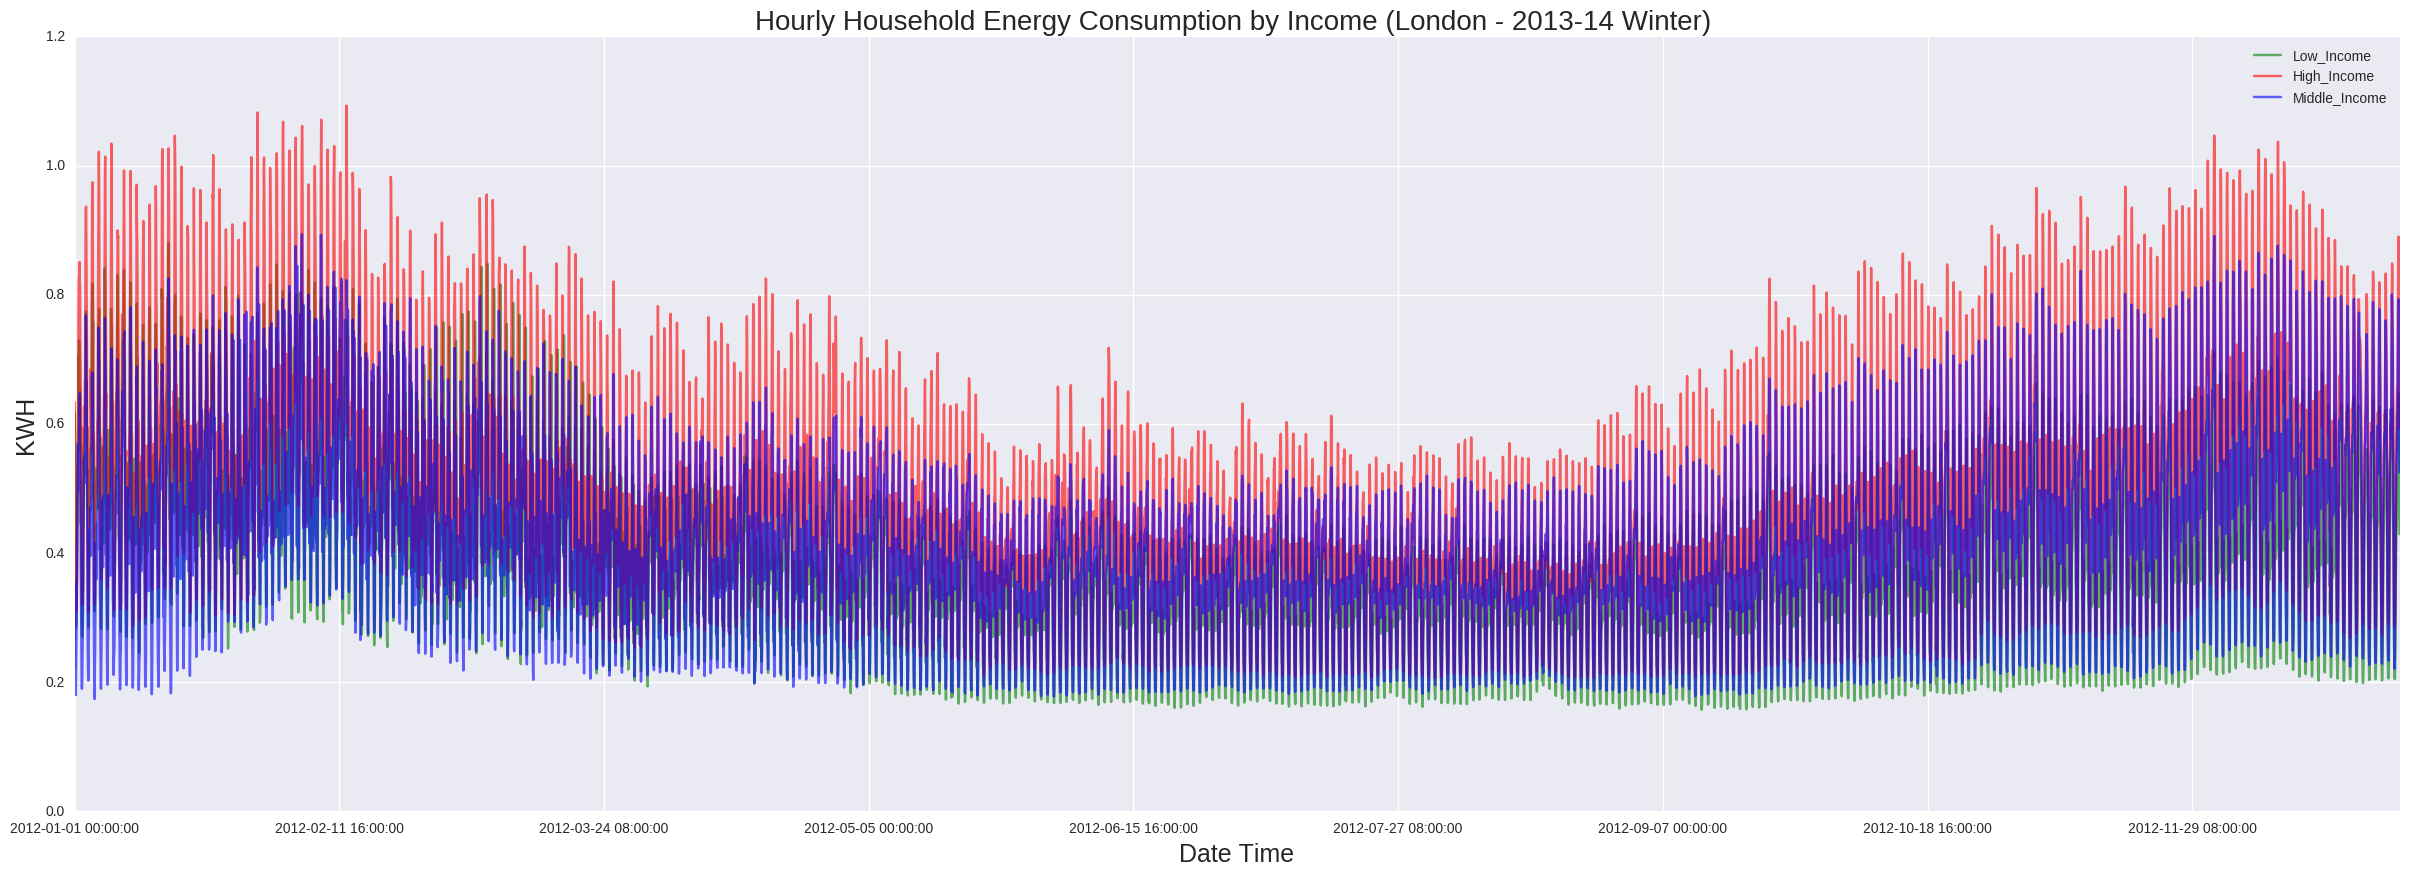

In [13]:
ax = pl.figure(figsize=(30,10)).add_subplot(111)
energy2012.plot(x='Datetime', y='Low_Income', color='Green',alpha=.6, ax=ax)
energy2012.plot(x='Datetime', y='High_Income', color='Red', alpha=.6, ax=ax)
energy2012.plot(x='Datetime', y='Middle_Income', color='Blue',alpha=.6, ax=ax)
pl.title('Hourly Household Energy Consumption by Income (London - 2013-14 Winter) ', fontsize=20)
pl.ylabel("KWH", fontsize=18)
pl.xlabel("Date Time", fontsize=18)

In [14]:
#weather = weather.convert_objects(convert_numeric=True)
#weather1 = weather[:2136]
weather2012.drop('Unnamed: 0', 1, inplace=True)
weather2012.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Datetime  Dew_Point_F  Humidity  \
2012-01-01 00:00:00  2012-01-01 00:00:00         50.0      88.0   
2012-01-01 01:00:00  2012-01-01 01:00:00         50.0      88.0   
2012-01-01 02:00:00  2012-01-01 02:00:00         51.8      94.0   
2012-01-01 03:00:00  2012-01-01 03:00:00         51.0      92.0   
2012-01-01 04:00:00  2012-01-01 04:00:00         50.0      88.0   

                     Temperature_F  Wind_Speed_MPH  
2012-01-01 00:00:00           53.6            13.8  
2012-01-01 01:00:00           53.6            15.0  
2012-01-01 02:00:00           53.6            13.8  
2012-01-01 03:00:00           53.0            13.8  
2012-01-01 04:00:00           53.6            10.4

In [15]:
energy2012.reset_index(inplace=True)
energy2012.head()

index             Datetime  Low_Income  High_Income  \
0 2012-01-01 00:00:00  2012-01-01 00:00:00    0.221192     0.268072   
1 2012-01-01 01:00:00  2012-01-01 01:00:00    0.616456     0.633311   
2 2012-01-01 02:00:00  2012-01-01 02:00:00    0.483976     0.570036   
3 2012-01-01 03:00:00  2012-01-01 03:00:00    0.375616     0.489018   
4 2012-01-01 04:00:00  2012-01-01 04:00:00    0.324936     0.376808   

   Middle_Income   Overall  
0       0.190114  0.231749  
1       0.355447  0.550101  
2       0.296605  0.466764  
3       0.236228  0.383123  
4       0.206053  0.312892

In [16]:
weather2012.reset_index(inplace=True)
weather2012.head()

index             Datetime  Dew_Point_F  Humidity  \
0 2012-01-01 00:00:00  2012-01-01 00:00:00         50.0      88.0   
1 2012-01-01 01:00:00  2012-01-01 01:00:00         50.0      88.0   
2 2012-01-01 02:00:00  2012-01-01 02:00:00         51.8      94.0   
3 2012-01-01 03:00:00  2012-01-01 03:00:00         51.0      92.0   
4 2012-01-01 04:00:00  2012-01-01 04:00:00         50.0      88.0   

   Temperature_F  Wind_Speed_MPH  
0           53.6            13.8  
1           53.6            15.0  
2           53.6            13.8  
3           53.0            13.8  
4           53.6            10.4

In [18]:
final2012 = pd.merge(weather2012, energy2012, on='index')

In [19]:
final2012.head()

index           Datetime_x  Dew_Point_F  Humidity  \
0 2012-01-01 00:00:00  2012-01-01 00:00:00         50.0      88.0   
1 2012-01-01 01:00:00  2012-01-01 01:00:00         50.0      88.0   
2 2012-01-01 02:00:00  2012-01-01 02:00:00         51.8      94.0   
3 2012-01-01 03:00:00  2012-01-01 03:00:00         51.0      92.0   
4 2012-01-01 04:00:00  2012-01-01 04:00:00         50.0      88.0   

   Temperature_F  Wind_Speed_MPH           Datetime_y  Low_Income  \
0           53.6            13.8  2012-01-01 00:00:00    0.221192   
1           53.6            15.0  2012-01-01 01:00:00    0.616456   
2           53.6            13.8  2012-01-01 02:00:00    0.483976   
3           53.0            13.8  2012-01-01 03:00:00    0.375616   
4           53.6            10.4  2012-01-01 04:00:00    0.324936   

   High_Income  Middle_Income   Overall  
0     0.268072       0.190114  0.231749  
1     0.633311       0.355447  0.550101  
2     0.570036       0.296605  0.466764  
3     0.489018       0.236228  0.383123  
4     0.376808       0.206053  0.312892

In [20]:
final2012.drop(['Datetime_x', 'Datetime_y'], axis=1, inplace=True)
final2012.head()

index  Dew_Point_F  Humidity  Temperature_F  Wind_Speed_MPH  \
0 2012-01-01 00:00:00         50.0      88.0           53.6            13.8   
1 2012-01-01 01:00:00         50.0      88.0           53.6            15.0   
2 2012-01-01 02:00:00         51.8      94.0           53.6            13.8   
3 2012-01-01 03:00:00         51.0      92.0           53.0            13.8   
4 2012-01-01 04:00:00         50.0      88.0           53.6            10.4   

   Low_Income  High_Income  Middle_Income   Overall  
0    0.221192     0.268072       0.190114  0.231749  
1    0.616456     0.633311       0.355447  0.550101  
2    0.483976     0.570036       0.296605  0.466764  
3    0.375616     0.489018       0.236228  0.383123  
4    0.324936     0.376808       0.206053  0.312892

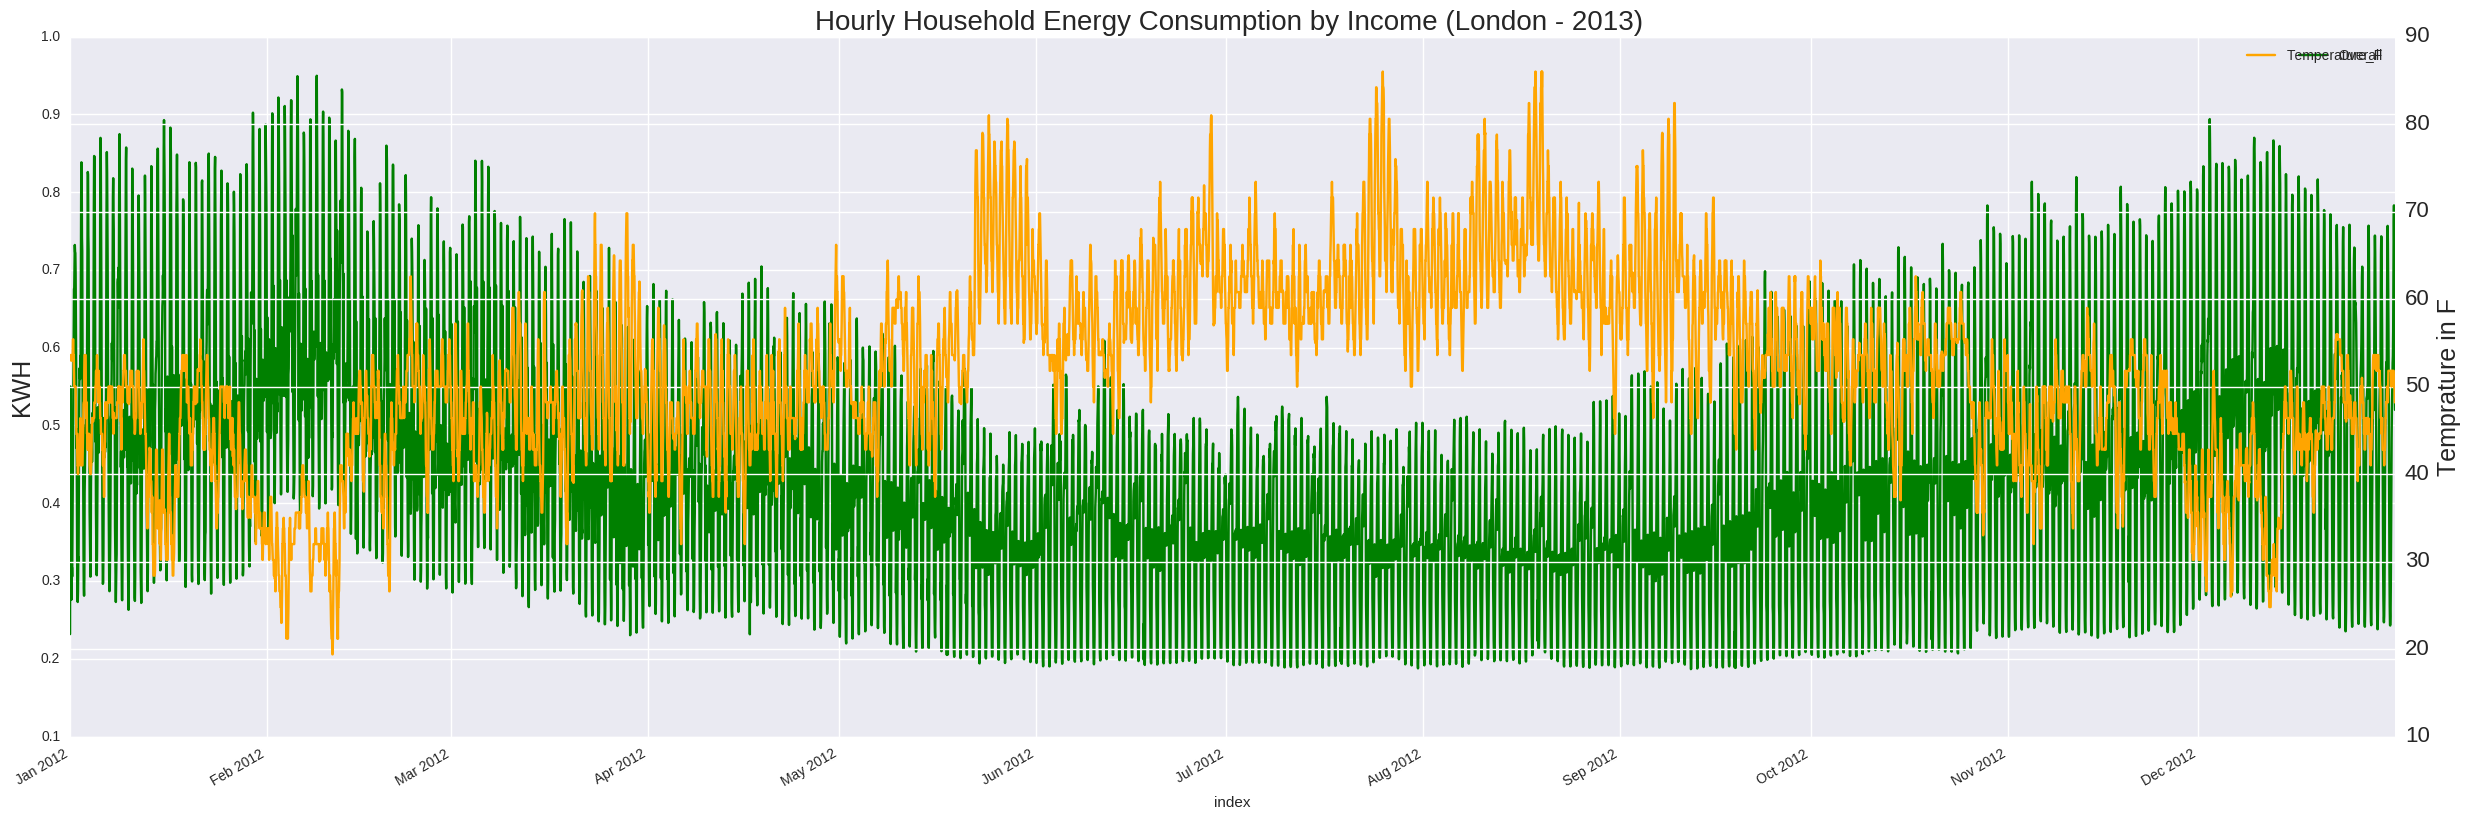

In [21]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
ax2 = ax1.twinx()
final2012.plot(x='index', y='Overall', color='Green',alpha=1, ax=ax1)
#final2012.plot(x='index', y='Low_Income', color='Green',alpha=.2, ax=ax1)
#final2012.plot(x='index', y='High_Income', color='Red', alpha=.1, ax=ax1)
#final2012.plot(x='index', y='Middle_Income', color='Blue',alpha=.1, ax=ax1)
final2012.plot(x='index', y='Temperature_F', fontsize=16, color='orange', alpha=1, ax=ax2)
pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax2.set_ylabel("Temprature in F", fontsize=18)
pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

In [22]:
hours = 24

In [23]:
final2012['rollingmean_nrg'] = pd.rolling_mean(final2012.Overall, hours)
final2012['rollingmean_temp'] = pd.rolling_mean(final2012.Temperature_F, hours)
final2012['rollingmean_humidity'] = pd.rolling_mean(final2012.Humidity, hours)
final2012['rollingmean_wind'] = pd.rolling_mean(final2012.Wind_Speed_MPH, hours)
final2012['rollingmean_dew'] = pd.rolling_mean(final2012.Dew_Point_F, hours)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  from ipykernel import kernelapp as app
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  app.launch_new_instance()
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated

In [24]:
final2012.tail(3)

index  Dew_Point_F  Humidity  Temperature_F  \
8758 2012-12-31 21:00:00         46.4      87.0           50.0   
8759 2012-12-31 22:00:00         46.4      93.0           48.2   
8760 2012-12-31 23:00:00         46.4      93.0           48.2   

      Wind_Speed_MPH  Low_Income  High_Income  Middle_Income   Overall  \
8758            11.5    0.533351     0.739589       0.650877  0.647336   
8759            11.5    0.478389     0.673837       0.600838  0.589433   
8760             9.2    0.429235     0.592214       0.524956  0.520088   

      rollingmean_nrg  rollingmean_temp  rollingmean_humidity  \
8758         0.498985             51.50             83.625000   
8759         0.497355             51.35             84.333333   
8760         0.495590             51.20             85.041667   

      rollingmean_wind  rollingmean_dew  
8758         17.316667           46.625  
8759         16.883333           46.700  
8760         16.500000           46.775

## Rolling mean plots

### Energy vs. temp

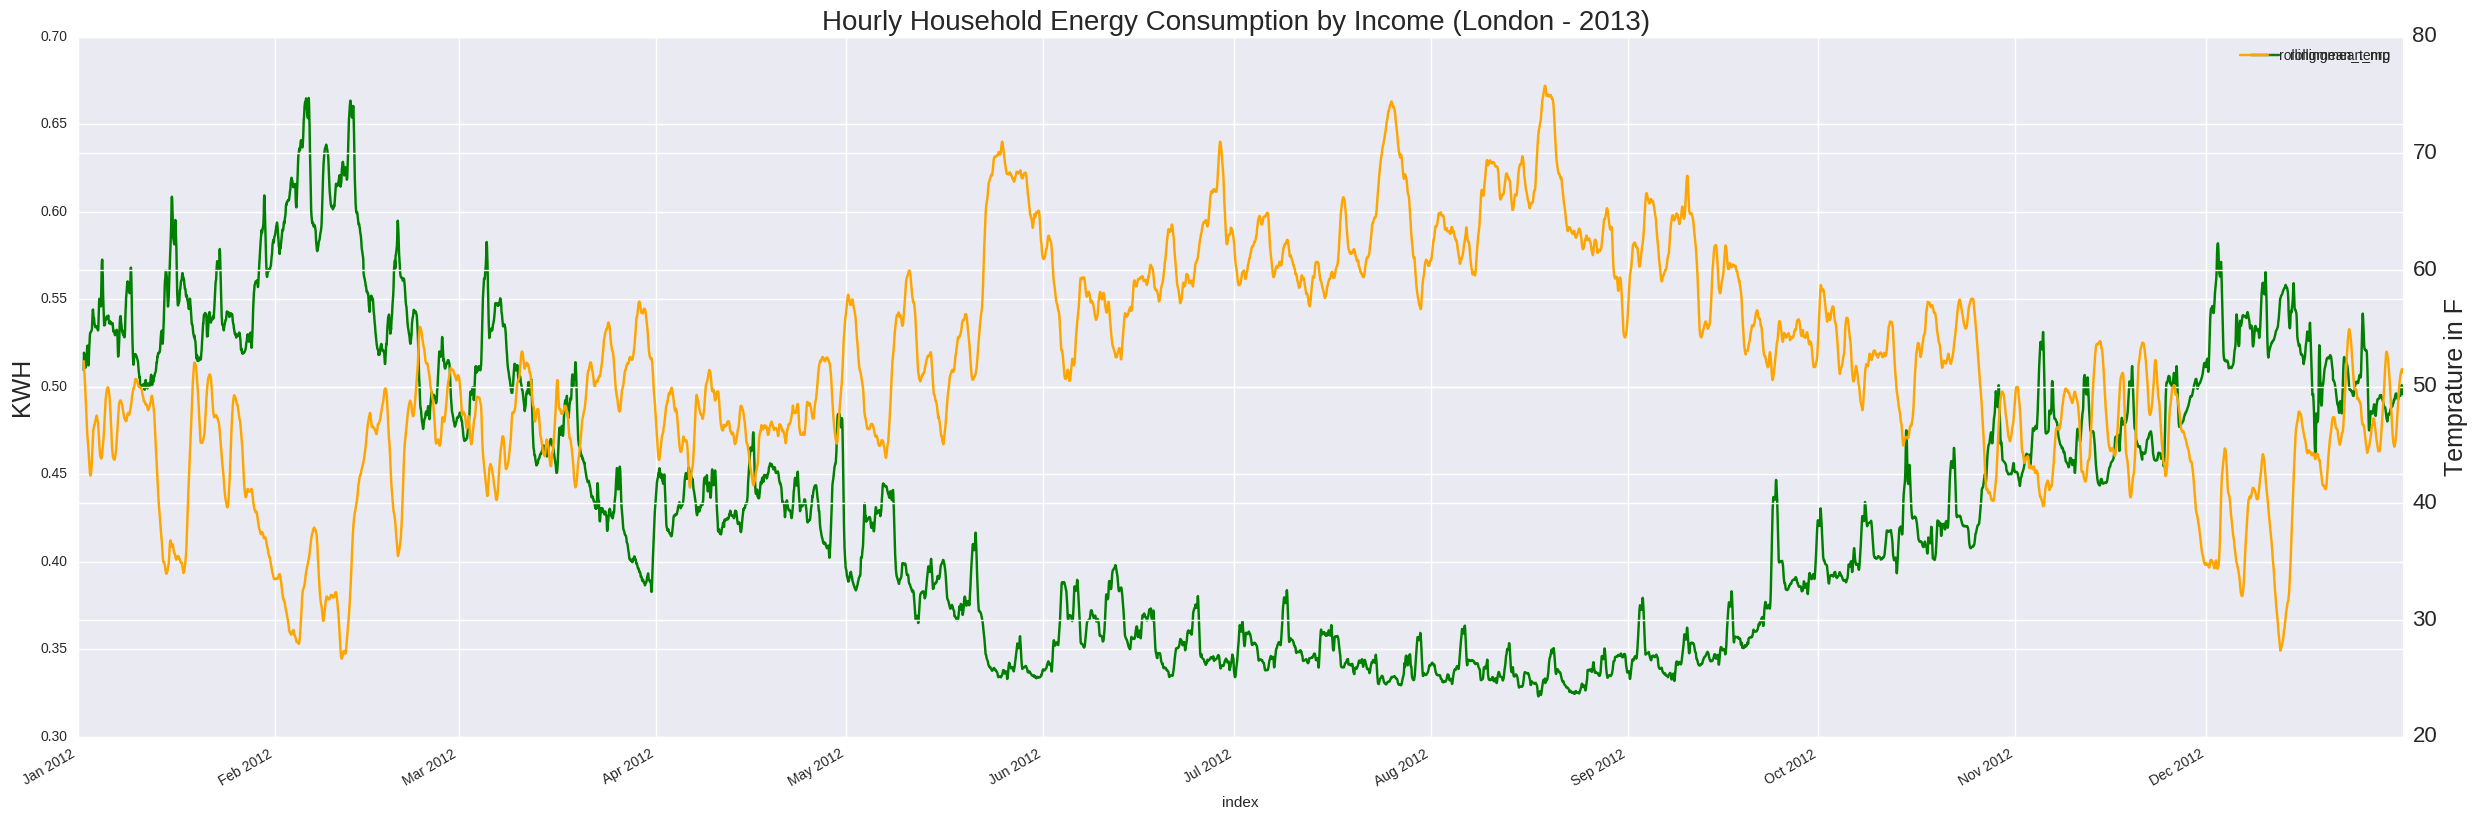

In [25]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
ax2 = ax1.twinx()
final2012.plot(x='index', y='rollingmean_nrg', color='Green',alpha=1, ax=ax1)
final2012.plot(x='index', y='rollingmean_temp', fontsize=16, color='orange', alpha=1, ax=ax2)
pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax2.set_ylabel("Temprature in F", fontsize=18)
pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

### Energy vs. humidity

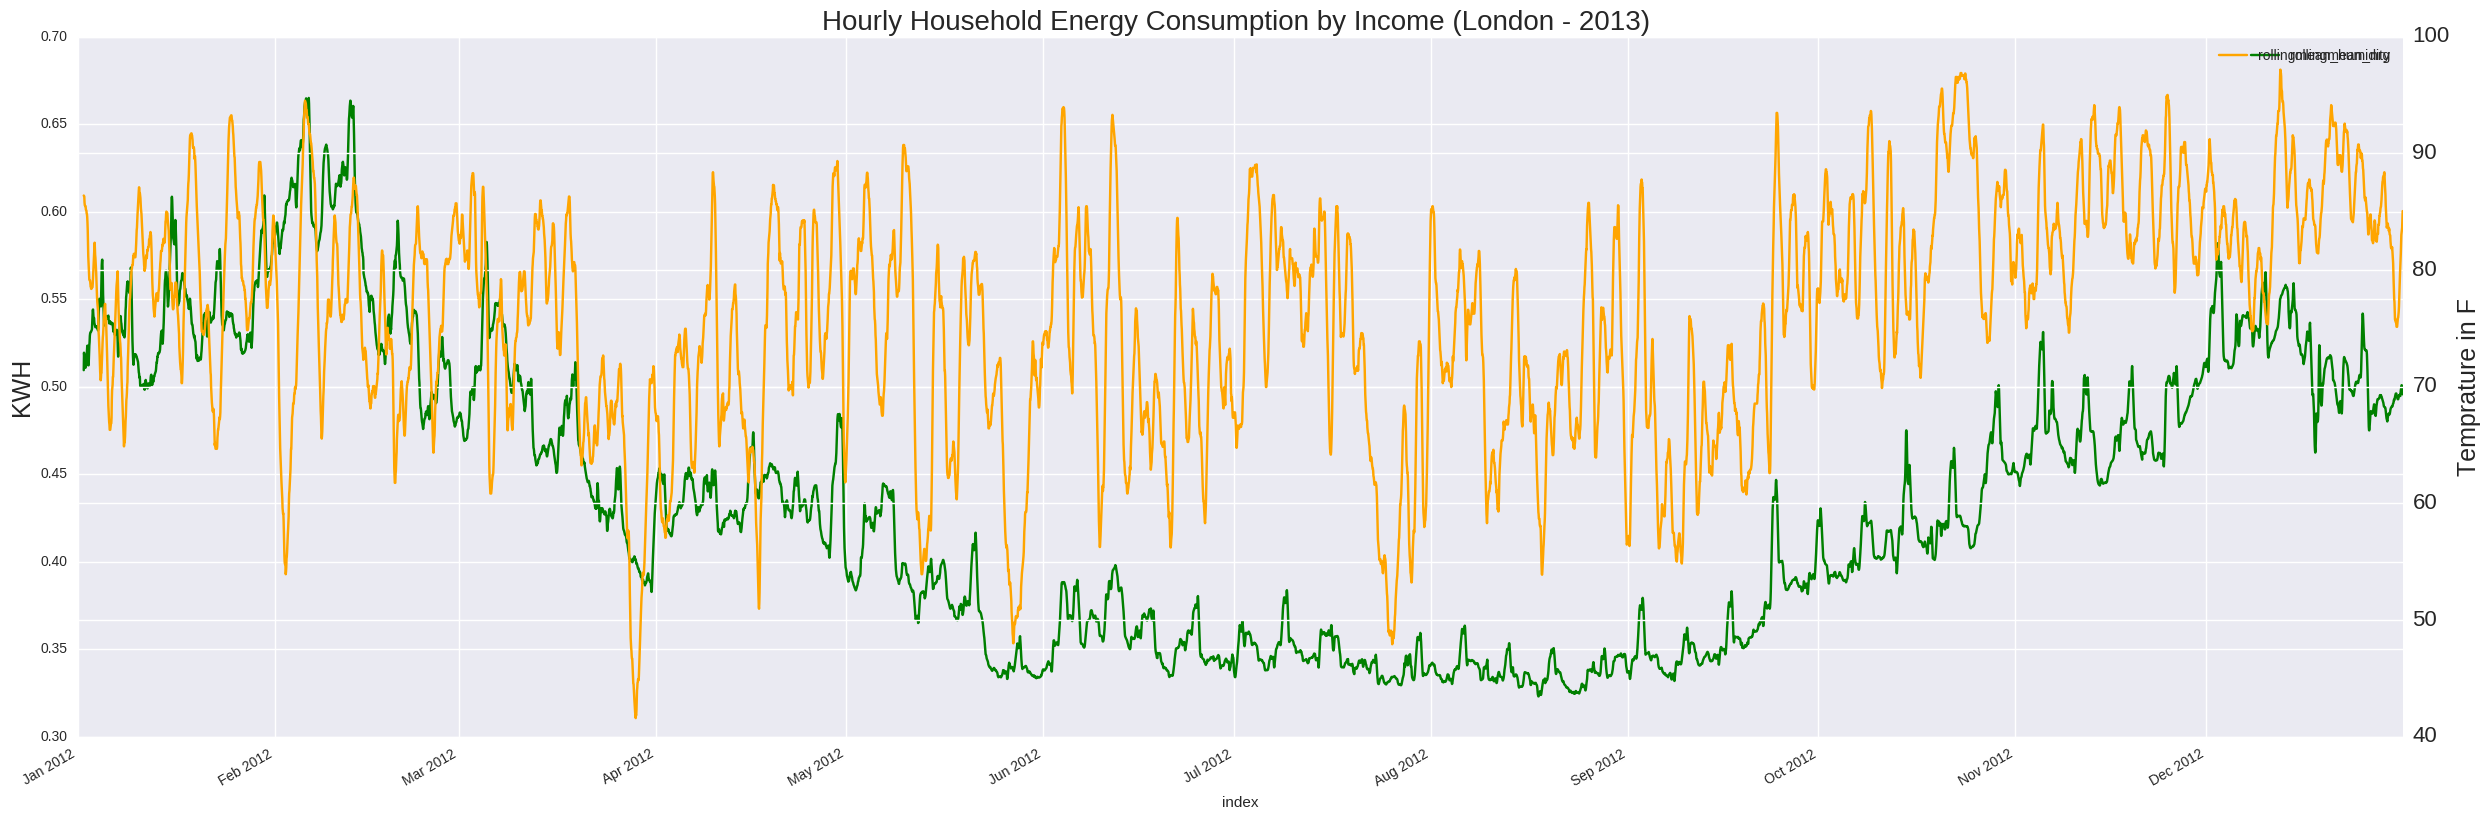

In [26]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
ax2 = ax1.twinx()
final2012.plot(x='index', y='rollingmean_nrg', color='Green',alpha=1, ax=ax1)
final2012.plot(x='index', y='rollingmean_humidity', fontsize=16, color='orange', alpha=1, ax=ax2)
pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax2.set_ylabel("Temprature in F", fontsize=18)
pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

### Energy vs. wind

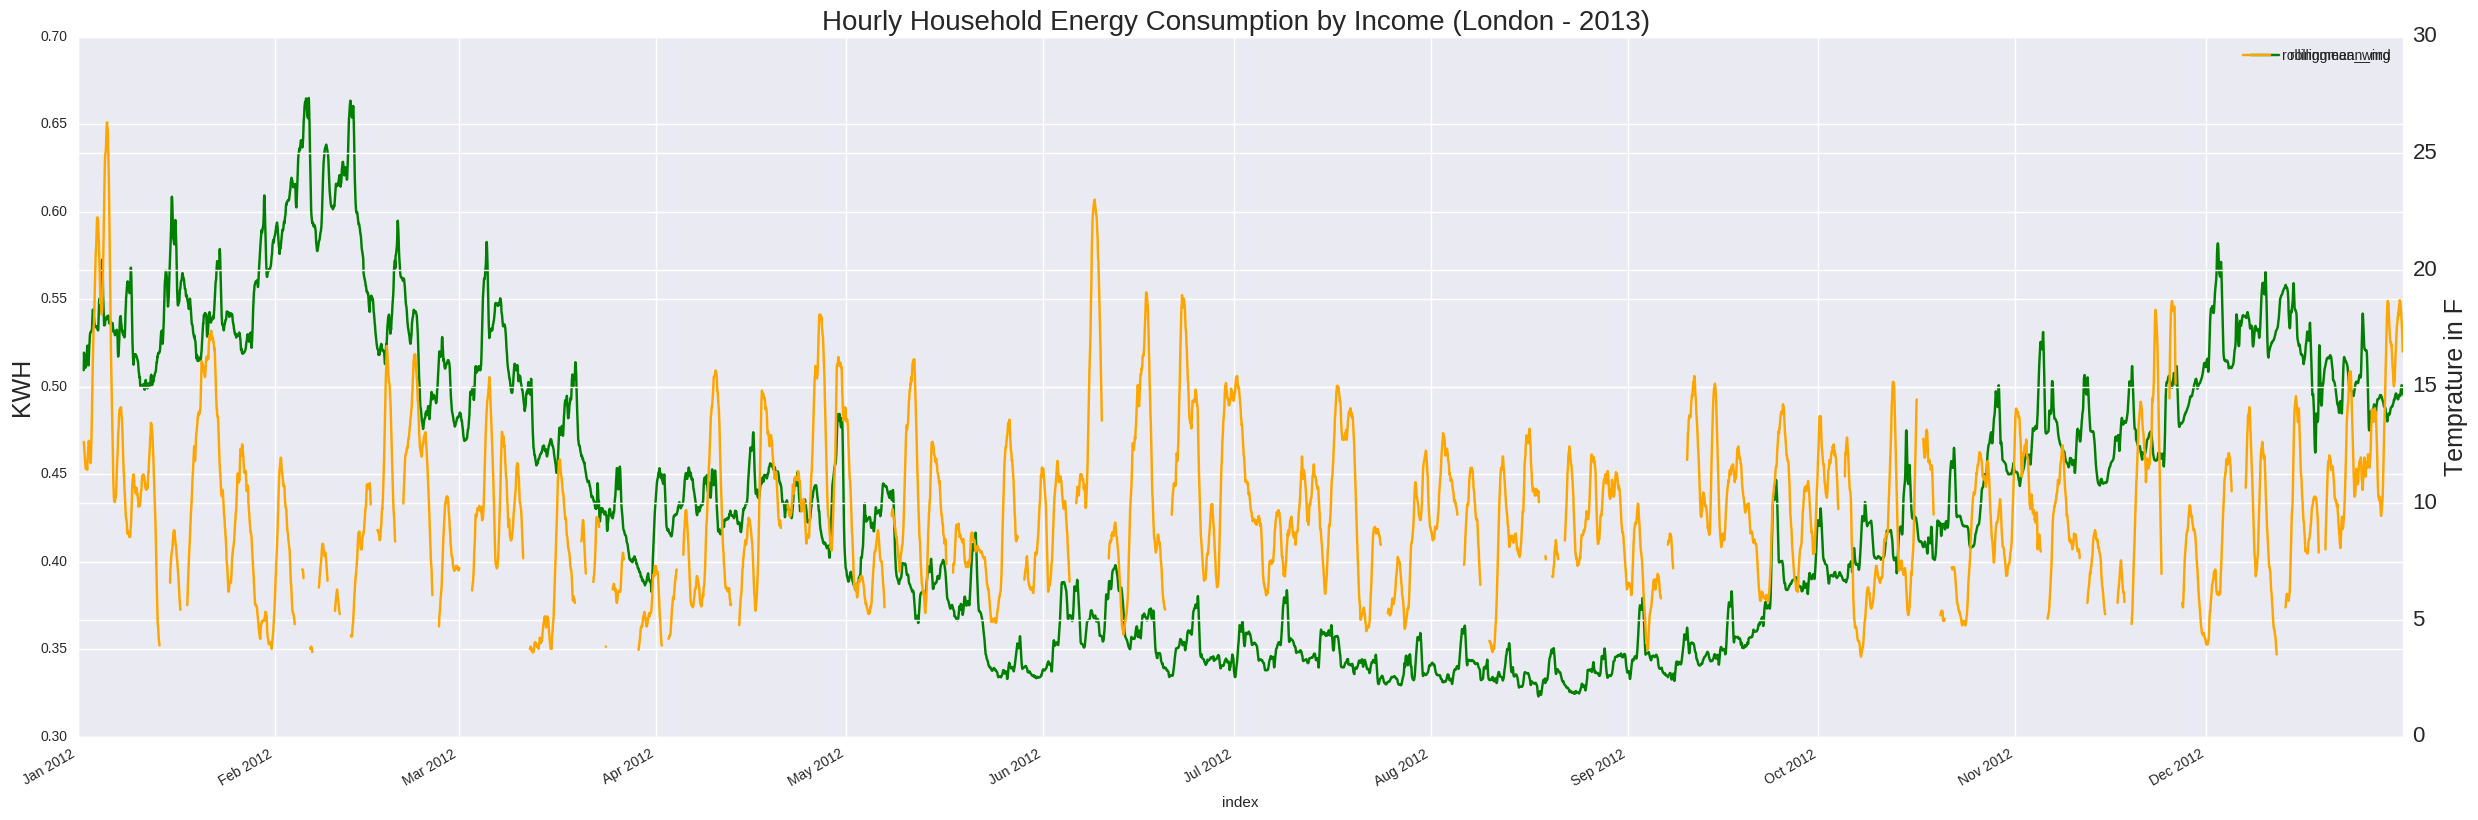

In [27]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
ax2 = ax1.twinx()
final2012.plot(x='index', y='rollingmean_nrg', color='Green',alpha=1, ax=ax1)
#final2012.plot(x='index', y='Low_Income', color='Green',alpha=.2, ax=ax1)
#final2012.plot(x='index', y='High_Income', color='Red', alpha=.1, ax=ax1)
#final2012.plot(x='index', y='Middle_Income', color='Blue',alpha=.1, ax=ax1)
final2012.plot(x='index', y='rollingmean_wind', fontsize=16, color='orange', alpha=1, ax=ax2)
pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax2.set_ylabel("Temprature in F", fontsize=18)
pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

### Energy vs. dew point

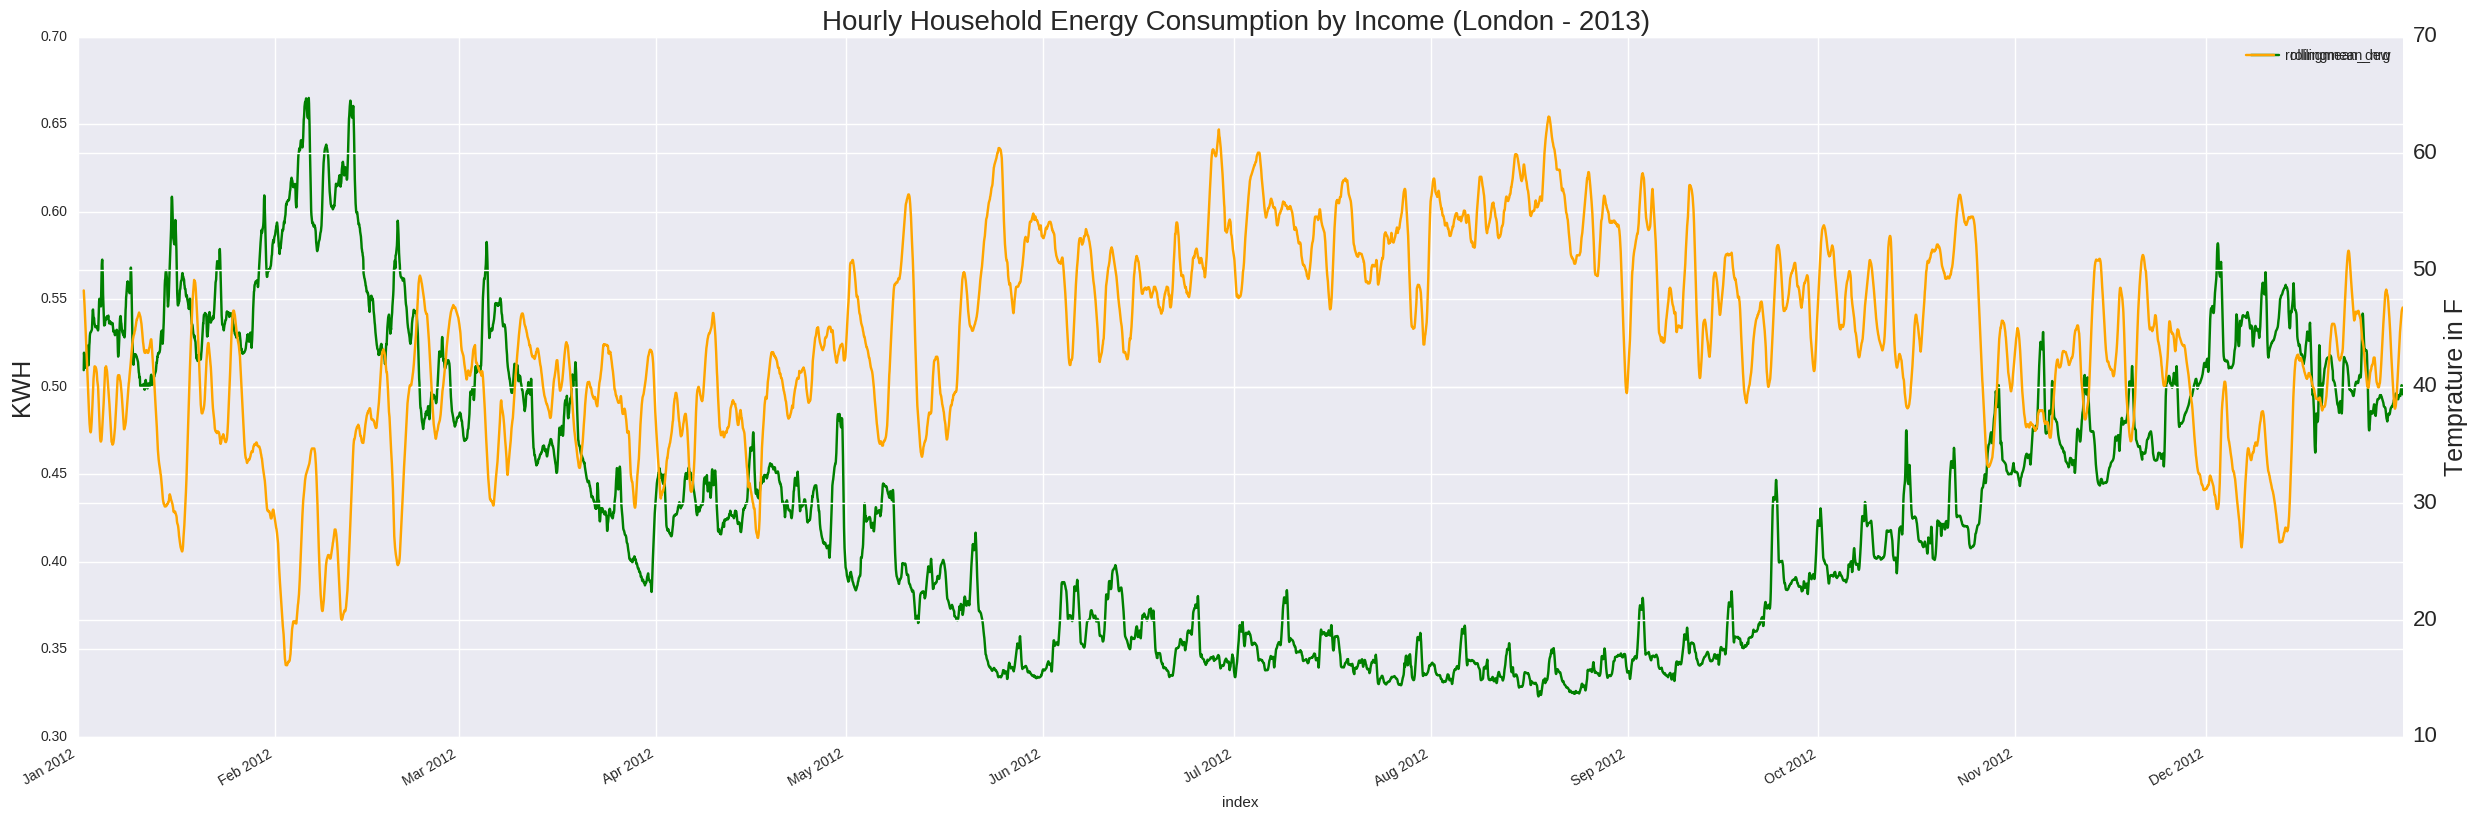

In [28]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
ax2 = ax1.twinx()
final2012.plot(x='index', y='rollingmean_nrg', color='Green',alpha=1, ax=ax1)
final2012.plot(x='index', y='rollingmean_dew', fontsize=16, color='orange', alpha=1, ax=ax2)
pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax2.set_ylabel("Temprature in F", fontsize=18)
pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

In [29]:
#OLS of rolling mean energy consumption ~ rolling mean Temperature_F
regress1 = smf.ols(formula = 'rollingmean_nrg ~ rollingmean_temp', data = final2012).fit()
print ('pvalue for temperature vs low income is ', regress1.pvalues[1])
regress1.summary()

pvalue for temperature vs low income is  0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        rollingmean_nrg   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                 3.238e+04
Date:                Wed, 07 Dec 2016   Prob (F-statistic):               0.00
Time:                        15:06:22   Log-Likelihood:                 16335.
No. Observations:                8738   AIC:                        -3.267e+04
Df Residuals:                    8736   BIC:                        -3.265e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            0.8245      0.002    373.178      0.000         0.820     0.829
rollingmean_temp    -0.0075   4.19e-05   -179.954      0.000        -0.008    -0.007
==============================================================================
Omnibus:                      342.005   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.044
Skew:                           0.478   Prob(JB):                     1.47e-79
Kurtosis:                       2.714   Cond. No.                         292.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
regress1.rsquared

In [94]:
reg_wind = smf.ols(formula = 'rollingmean_nrg ~ rollingmean_wind', data = final2012).fit()
reg_humidity = smf.ols(formula = 'rollingmean_nrg ~ rollingmean_humidity', data = final2012).fit()
reg_dew = smf.ols(formula = 'rollingmean_nrg ~ rollingmean_dew', data = final2012).fit()

In [97]:
print ("Rsquared for temp: %.2f" %regress1.rsquared)
print ("Rsquared for wind: %.2f" %reg_wind.rsquared)
print ("Rsquared for humidity: %.2f" %reg_humidity.rsquared)
print ("Rsquared for dew point: %.2f" %reg_dew.rsquared)

Rsquared for temp: 0.82
Rsquared for wind: 0.02
Rsquared for humidity: 0.20
Rsquared for dew point: 0.61


In [24]:
#OLS of Low_Income ~ Temperature_F
regress1 = smf.ols(formula = 'Low_Income ~ Temperature_F', data = final2012_14).fit()
print ('pvalue for temperature vs low income is ', regress1.pvalues[1])
regress1.summary()

pvalue for temperature vs low income is  1.02315130986e-11


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Low_Income   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     46.80
Date:                Fri, 02 Dec 2016   Prob (F-statistic):           1.02e-11
Time:                        15:40:45   Log-Likelihood:                 1387.7
No. Observations:                2135   AIC:                            -2771.
Df Residuals:                    2133   BIC:                            -2760.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.2362      0.026      9.192      0.000         0.186     0.287
Temperature_F     0.0039      0.001      6.841      0.000         0.003     0.005
==============================================================================
Omnibus:                      221.291   Durbin-Watson:                   0.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.730
Skew:                           0.250   Prob(JB):                     1.08e-18
Kurtosis:                       2.175   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

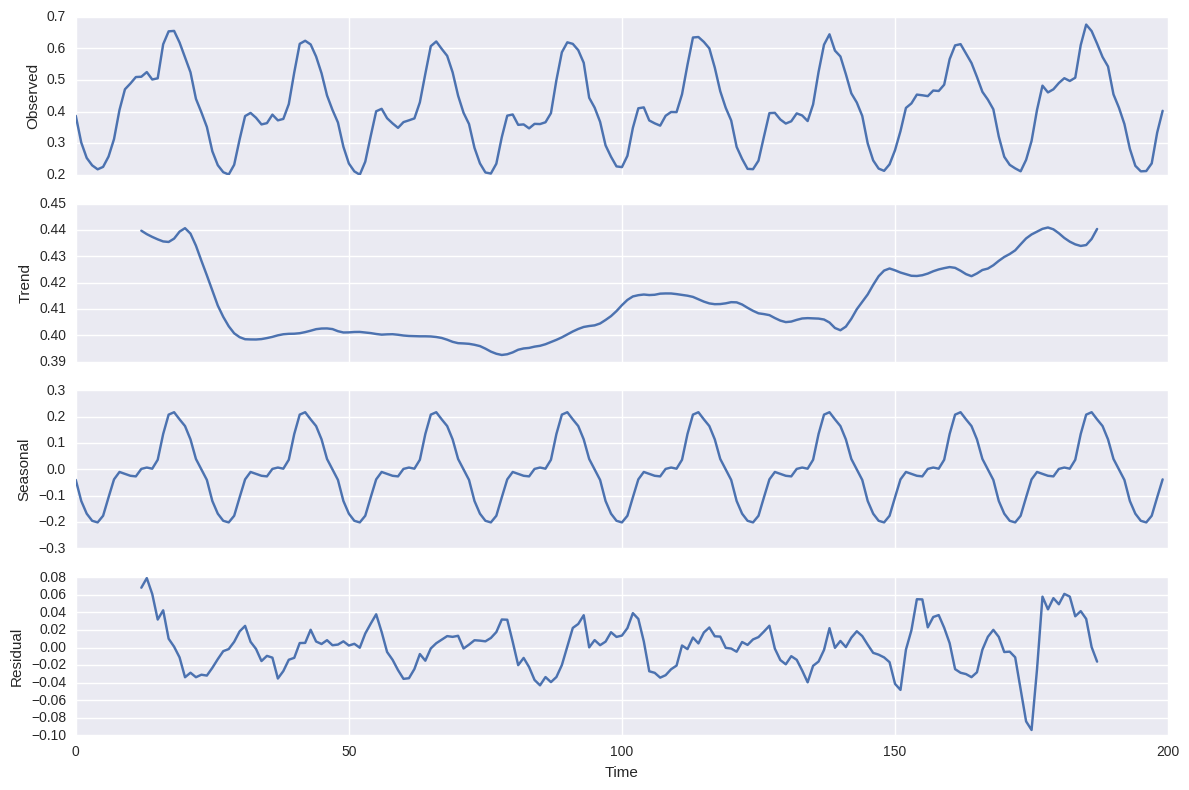

In [81]:
##Seasonal Decomposition of low income energy

import statsmodels.api as sm

data = np.array(final2012_14.Low_Income)


res = sm.tsa.seasonal_decompose(data[:200], freq = 24)
plt.rcParams['figure.figsize'] = (12,8)
resplot = res.plot()

In [48]:
len(res.trend)

2135

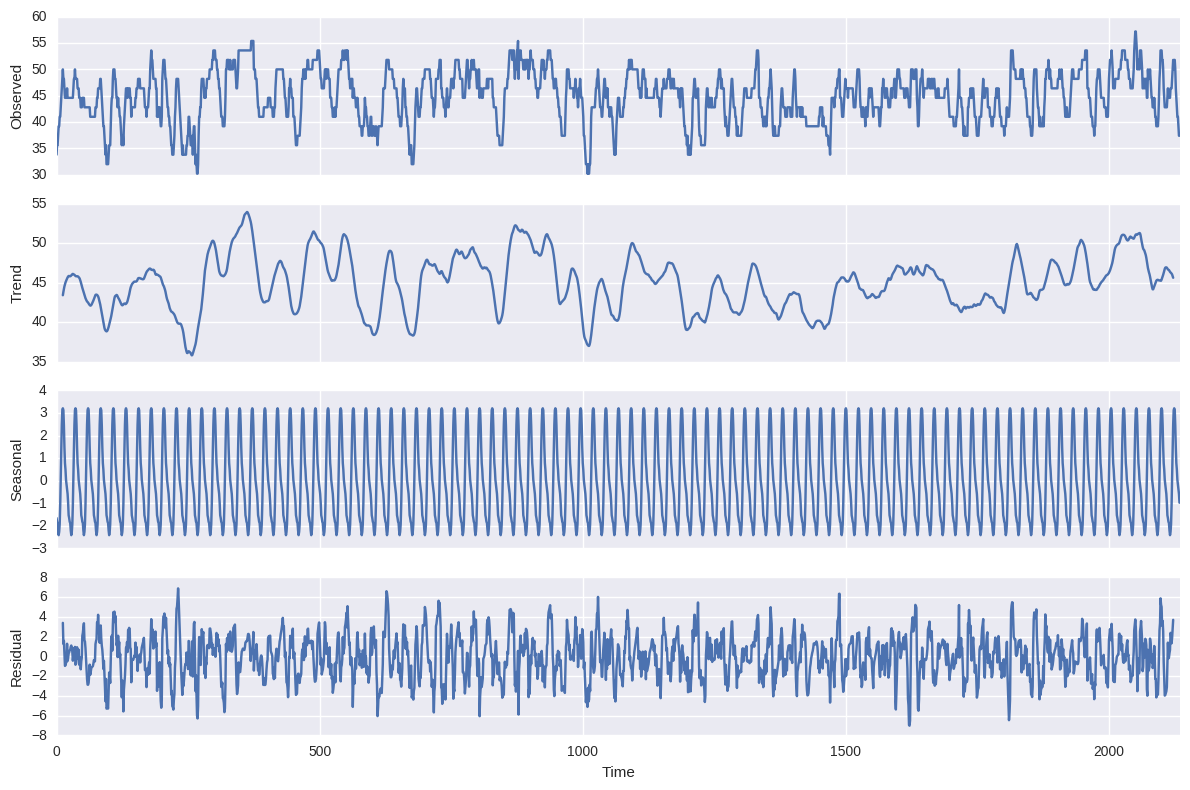

In [53]:
##Seasonal Decomposition of temperature
data1 = np.array(final2012_14.Temperature_F)

#Seasonal Decomposition using statsmodels api
res1 = sm.tsa.seasonal_decompose(data1, freq = 24)
plt.rcParams['figure.figsize'] = (12,8)
resplot = res1.plot()

In [68]:
#Adding the trends to dataframe
final2012_14['LI_trend'] = res.trend
final2012_14['temp_trend'] = res1.trend * 0.01
final2012_14['LI_resid'] = res.resid
final2012_14['temp_resid'] = res1.resid * 0.01
final2012_14.head(30)

index  Dew_Point_F  Temperature_F Wind_Speed_MPH  Low_Income  \
0  2013-12-01 01:00:00         33.8           33.8            4.6    0.386444   
1  2013-12-01 02:00:00         33.8           35.6            4.6    0.301773   
2  2013-12-01 03:00:00         35.6           35.6            4.6    0.253057   
3  2013-12-01 04:00:00         35.6           37.4            8.1    0.229611   
4  2013-12-01 05:00:00         37.4           39.2            4.6    0.217060   
5  2013-12-01 06:00:00         37.4           39.2            3.5    0.224744   
6  2013-12-01 07:00:00         37.4           41.0            5.8    0.257580   
7  2013-12-01 08:00:00         39.2           41.0            4.6    0.312774   
8  2013-12-01 09:00:00         39.2           42.8            4.6    0.404882   
9  2013-12-01 10:00:00         41.0           44.6            4.6    0.470331   
10 2013-12-01 11:00:00         42.8           46.4            5.8    0.488635   
11 2013-12-01 12:00:00         42.8           48.2            5.8    0.509109   
12 2013-12-01 13:00:00         42.8           50.0            3.5    0.510081   
13 2013-12-01 14:00:00         42.8           48.2            4.6    0.524822   
14 2013-12-01 15:00:00         42.8           48.2            2.3    0.501308   
15 2013-12-01 16:00:00         41.0           46.4            2.3    0.505158   
16 2013-12-01 17:00:00         41.0           44.6            3.5    0.612842   
17 2013-12-01 18:00:00         41.0           44.6            2.3    0.653707   
18 2013-12-01 19:00:00         42.8           44.6            3.5    0.655094   
19 2013-12-01 20:00:00         42.8           44.6            2.3    0.618435   
20 2013-12-01 21:00:00         42.8           46.4            4.6    0.571675   
21 2013-12-01 22:00:00         42.8           44.6           Calm    0.524154   
22 2013-12-01 23:00:00         42.8           44.6            2.3    0.440100   
23 2013-12-02 00:00:00         42.8           44.6            2.3    0.397325   
24 2013-12-02 01:00:00         42.8           44.6            2.3    0.351083   
25 2013-12-02 02:00:00         42.8           44.6           Calm    0.274224   
26 2013-12-02 03:00:00         42.8           44.6            2.3    0.230204   
27 2013-12-02 04:00:00         42.8           44.6            3.5    0.207940   
28 2013-12-02 05:00:00         42.8           44.6            2.3    0.200631   
29 2013-12-02 06:00:00         42.8           44.6            3.5    0.231491   

    High_Income  Middle_Income  LI_trend  temp_trend  LI_resid  temp_resid  
0      0.479599       0.424813       NaN         NaN       NaN         NaN  
1      0.381671       0.314566       NaN         NaN       NaN         NaN  
2      0.335496       0.263379       NaN         NaN       NaN         NaN  
3      0.312186       0.252521       NaN         NaN       NaN         NaN  
4      0.305041       0.253142       NaN         NaN       NaN         NaN  
5      0.325707       0.258932       NaN         NaN       NaN         NaN  
6      0.371590       0.294611       NaN         NaN       NaN         NaN  
7      0.473897       0.369425       NaN         NaN       NaN         NaN  
8      0.625931       0.486330       NaN         NaN       NaN         NaN  
9      0.685477       0.540041       NaN         NaN       NaN         NaN  
10     0.705744       0.538855       NaN         NaN       NaN         NaN  
11     0.701098       0.572428       NaN         NaN       NaN         NaN  
12     0.726956       0.576482  0.439709    0.434000  0.061599    0.033888  
13     0.752491       0.589289  0.438399    0.438125  0.079374    0.012632  
14     0.708125       0.564777  0.437349    0.441875  0.049733    0.015675  
15     0.710642       0.626465  0.436421    0.445250 -0.001074    0.003952  
16     0.894522       0.733226  0.435627    0.447875  0.003337   -0.009689  
17     1.047987       0.831068  0.435426    0.450125 -0.005306   -0.009045  
18     1.121351       0.834183  0.436700  

In [75]:
#OLS LI_trend ~ Temperature_F
regress4 = smf.ols(formula = 'LI_resid ~ temp_trend', data = final2012_14).fit()
print ('pvalue for temperature vs low income is ', regress4.pvalues[1])
regress4.summary()

pvalue for temperature vs low income is  0.982092982289


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LI_resid   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 0.0005039
Date:                Fri, 02 Dec 2016   Prob (F-statistic):              0.982
Time:                        17:54:36   Log-Likelihood:                 3825.0
No. Observations:                2111   AIC:                            -7646.
Df Residuals:                    2109   BIC:                            -7635.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0003      0.011      0.031      0.975        -0.022     0.022
temp_trend    -0.0006      0.025     -0.022      0.982        -0.049     0.048
==============================================================================
Omnibus:                       41.038   Durbin-Watson:                   0.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.936
Skew:                           0.230   Prob(JB):                     7.14e-13
Kurtosis:                       3.652   Cond. No.                         34.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

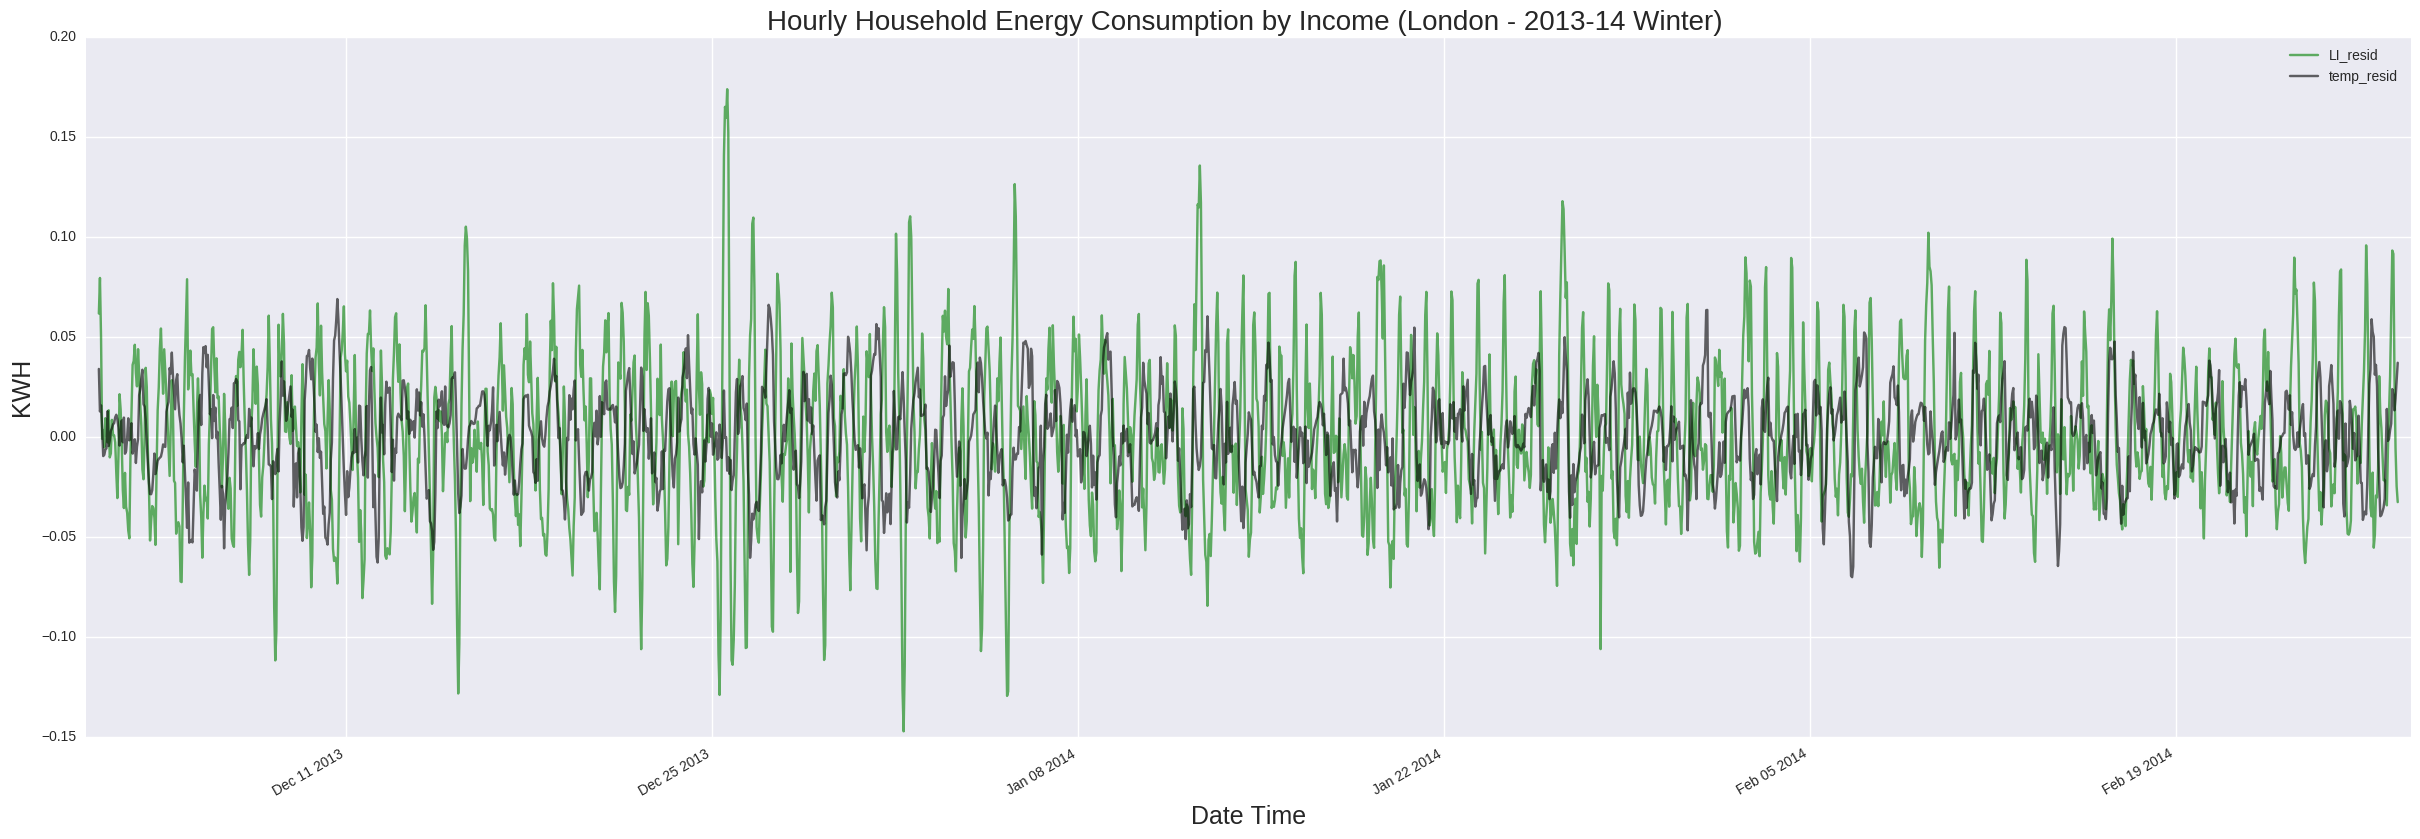

In [73]:
#plotting LI_trend and Temperature_F
ax = pl.figure(figsize=(30,10)).add_subplot(111)
final2012_14.plot(x='index', y='LI_resid', color='Green',alpha=.6, ax=ax)
final2012_14.plot(x='index', y='temp_resid', color='black',alpha=.6, ax=ax)
pl.title('Hourly Household Energy Consumption by Income (London - 2013-14 Winter) ', fontsize=20)
pl.ylabel("KWH", fontsize=18)
pl.xlabel("Date Time", fontsize=18)

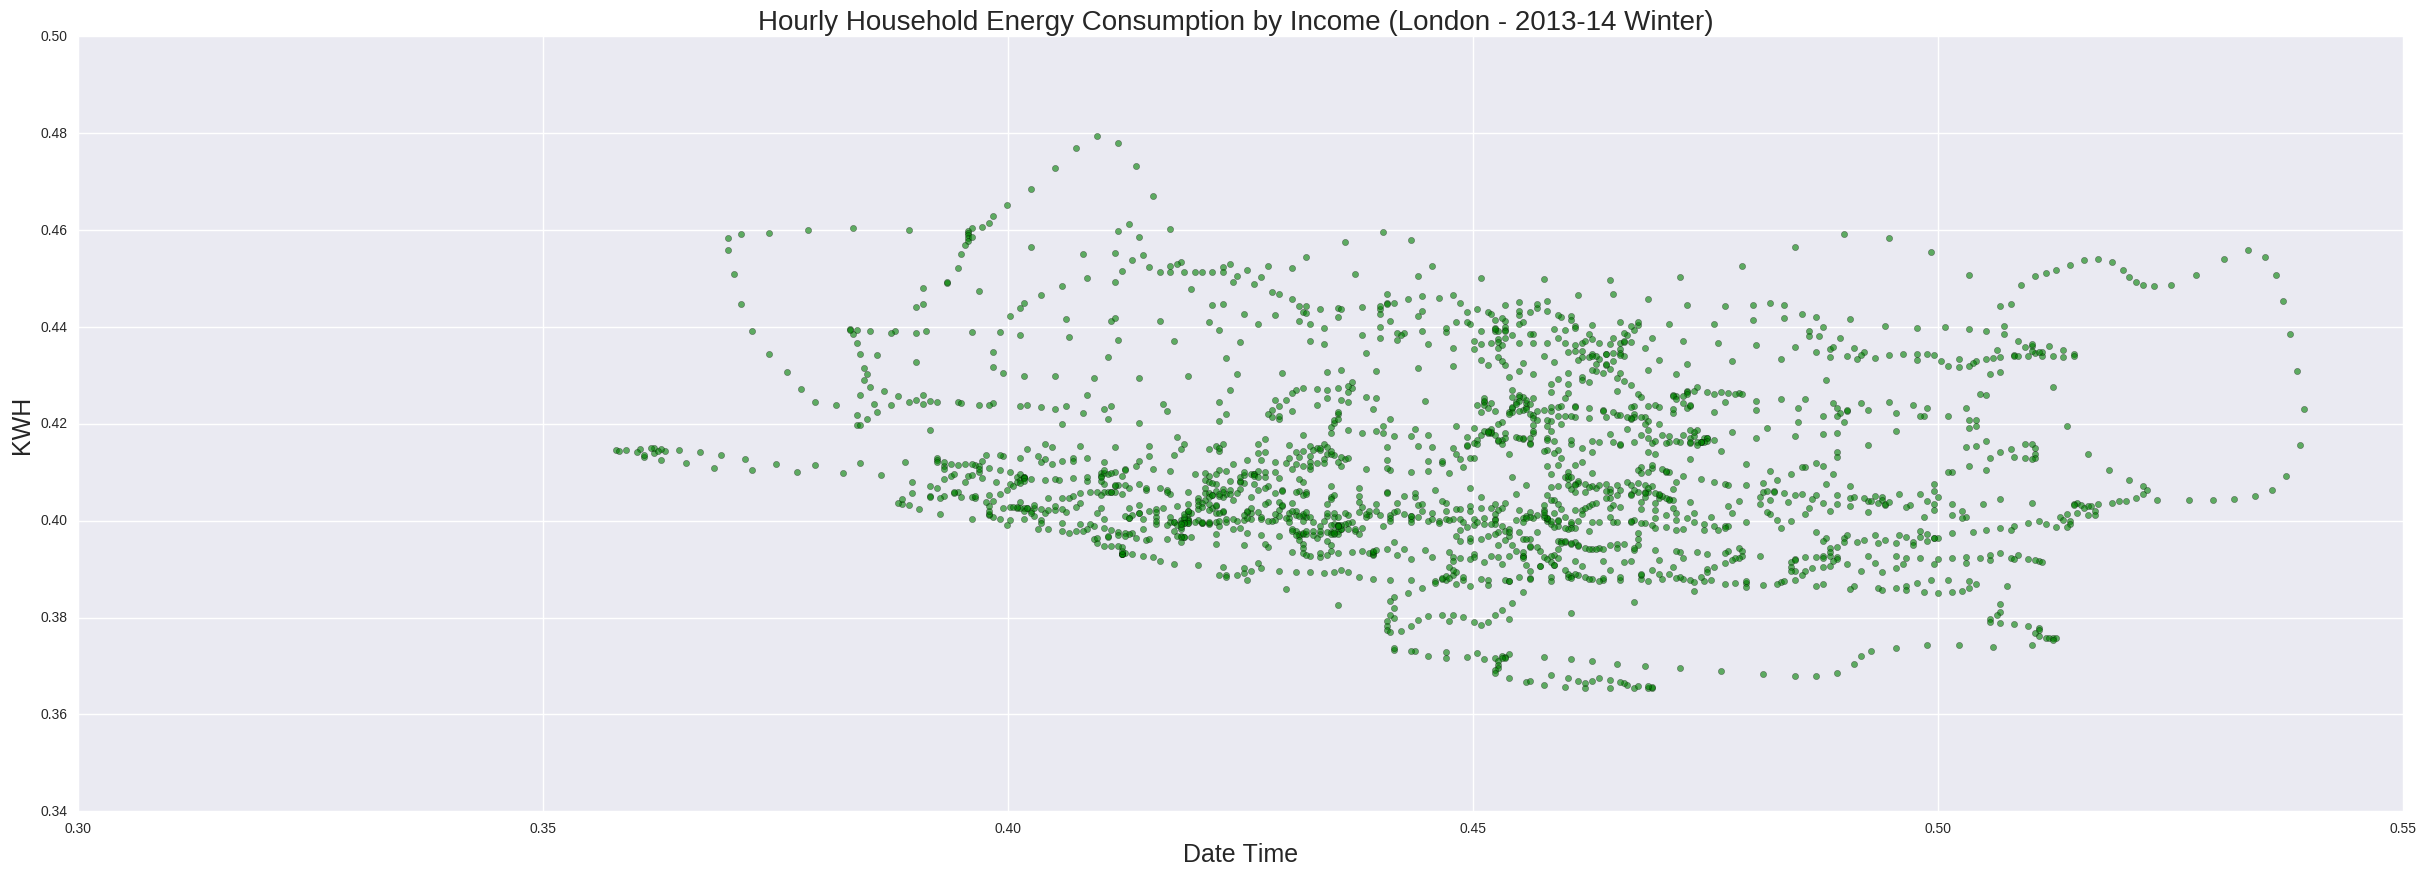

In [78]:
#plotting temperature vs low income energy trend
ax = pl.figure(figsize=(30,10)).add_subplot(111)
final2012_14.plot(kind='scatter', x='temp_trend', y='LI_trend', color='Green',alpha=.6, ax=ax)
#final2012_14.plot(x='index', y='Temperature_F', color='black',alpha=.6, ax=ax)
pl.title('Hourly Household Energy Consumption by Income (London - 2013-14 Winter) ', fontsize=20)
pl.ylabel("KWH", fontsize=18)
pl.xlabel("Date Time", fontsize=18)

In [69]:
#OLS LI_resid ~ Temperature_F
regress3 = smf.ols(formula = 'LI_resid ~ Temperature_F', data = final2012_14).fit()
print ('pvalue for temperature vs low income resid is ', regress3.pvalues[1])
regress3.summary()

pvalue for temperature vs low income resid is  0.404415177985


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LI_resid   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6954
Date:                Fri, 02 Dec 2016   Prob (F-statistic):              0.404
Time:                        17:48:49   Log-Likelihood:                 3825.3
No. Observations:                2111   AIC:                            -7647.
Df Residuals:                    2109   BIC:                            -7635.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.0068      0.008      0.841      0.400        -0.009     0.023
Temperature_F    -0.0001      0.000     -0.834      0.404        -0.001     0.000
==============================================================================
Omnibus:                       41.266   Durbin-Watson:                   0.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.821
Skew:                           0.228   Prob(JB):                     4.59e-13
Kurtosis:                       3.663   Cond. No.                         426.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

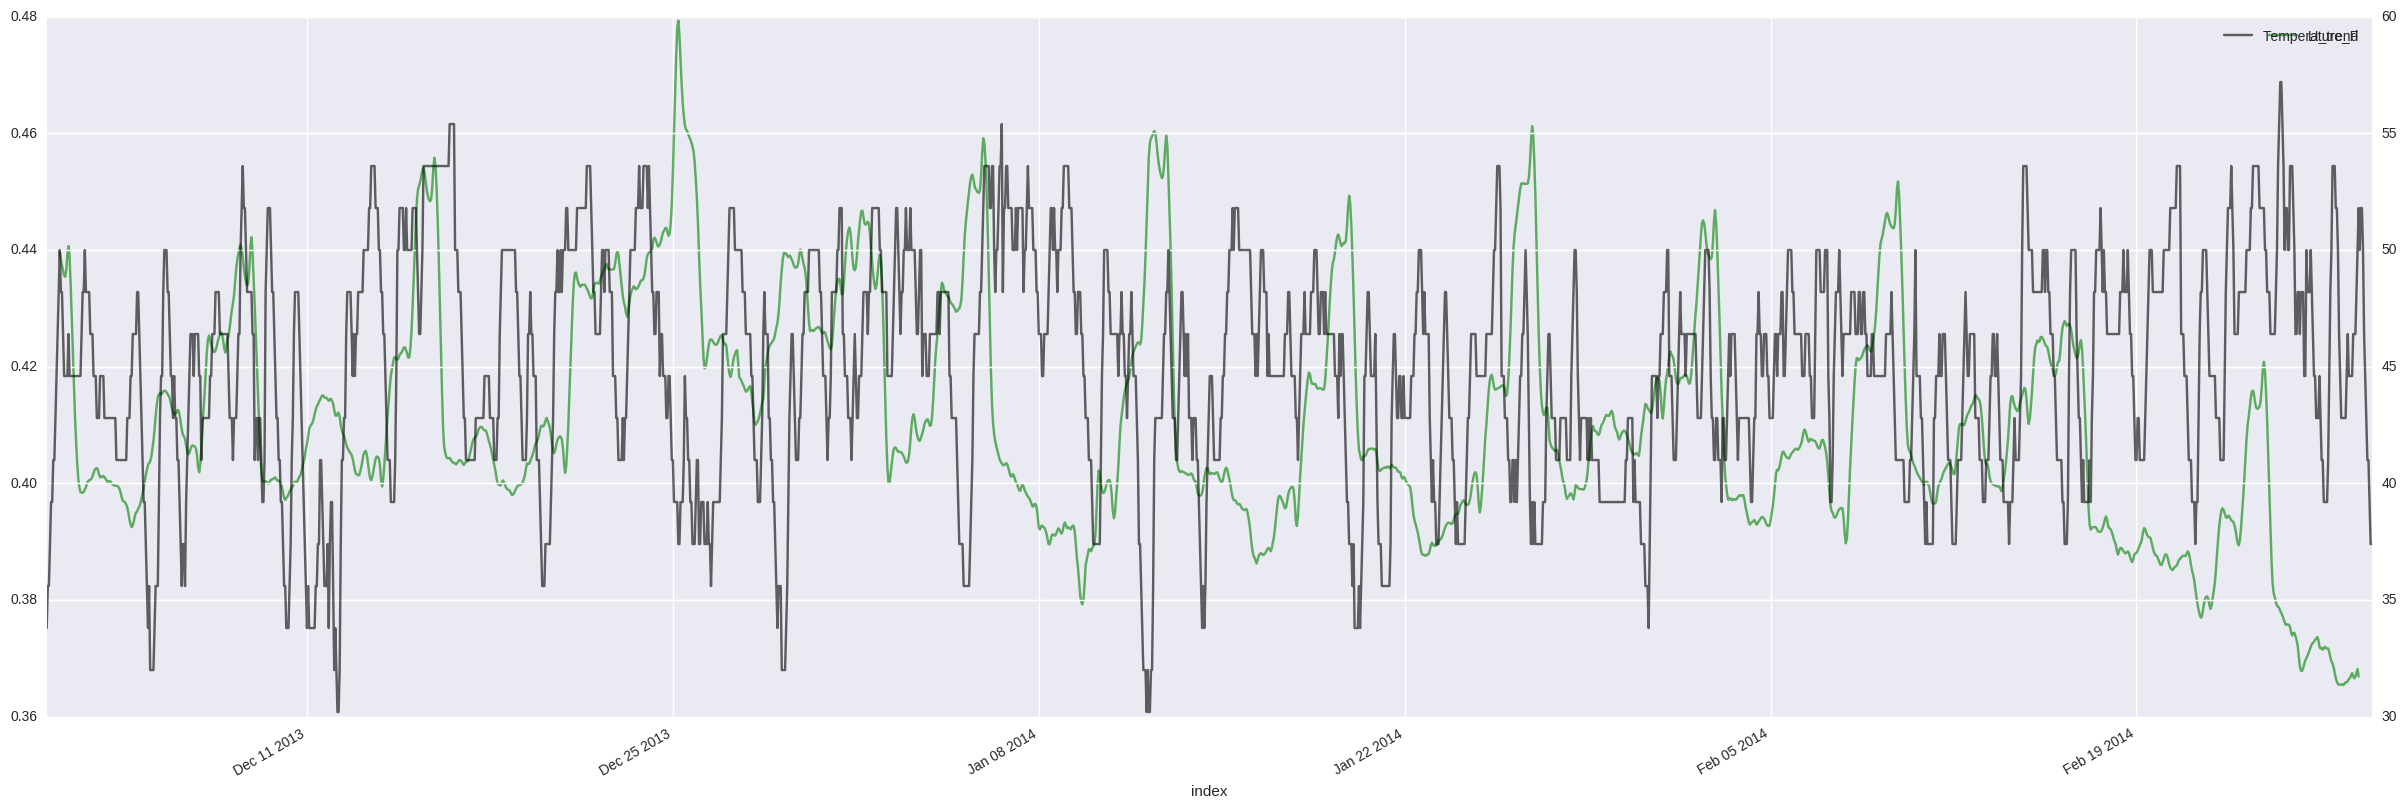

In [64]:
#plotting LI_trend and Temperature_F
ax = pl.figure(figsize=(30,10)).add_subplot(111)
final2012_14.plot(x='index', y='LI_trend', color='Green',alpha=.6, ax=ax)
final2012_14.plot(x='index', y='Temperature_F', color='black',alpha=.6, ax=ax)
pl.title('Hourly Household Energy Consumption by Income (London - 2013-14 Winter) ', fontsize=20)
pl.ylabel("KWH", fontsize=18)
pl.xlabel("Date Time", fontsize=18)

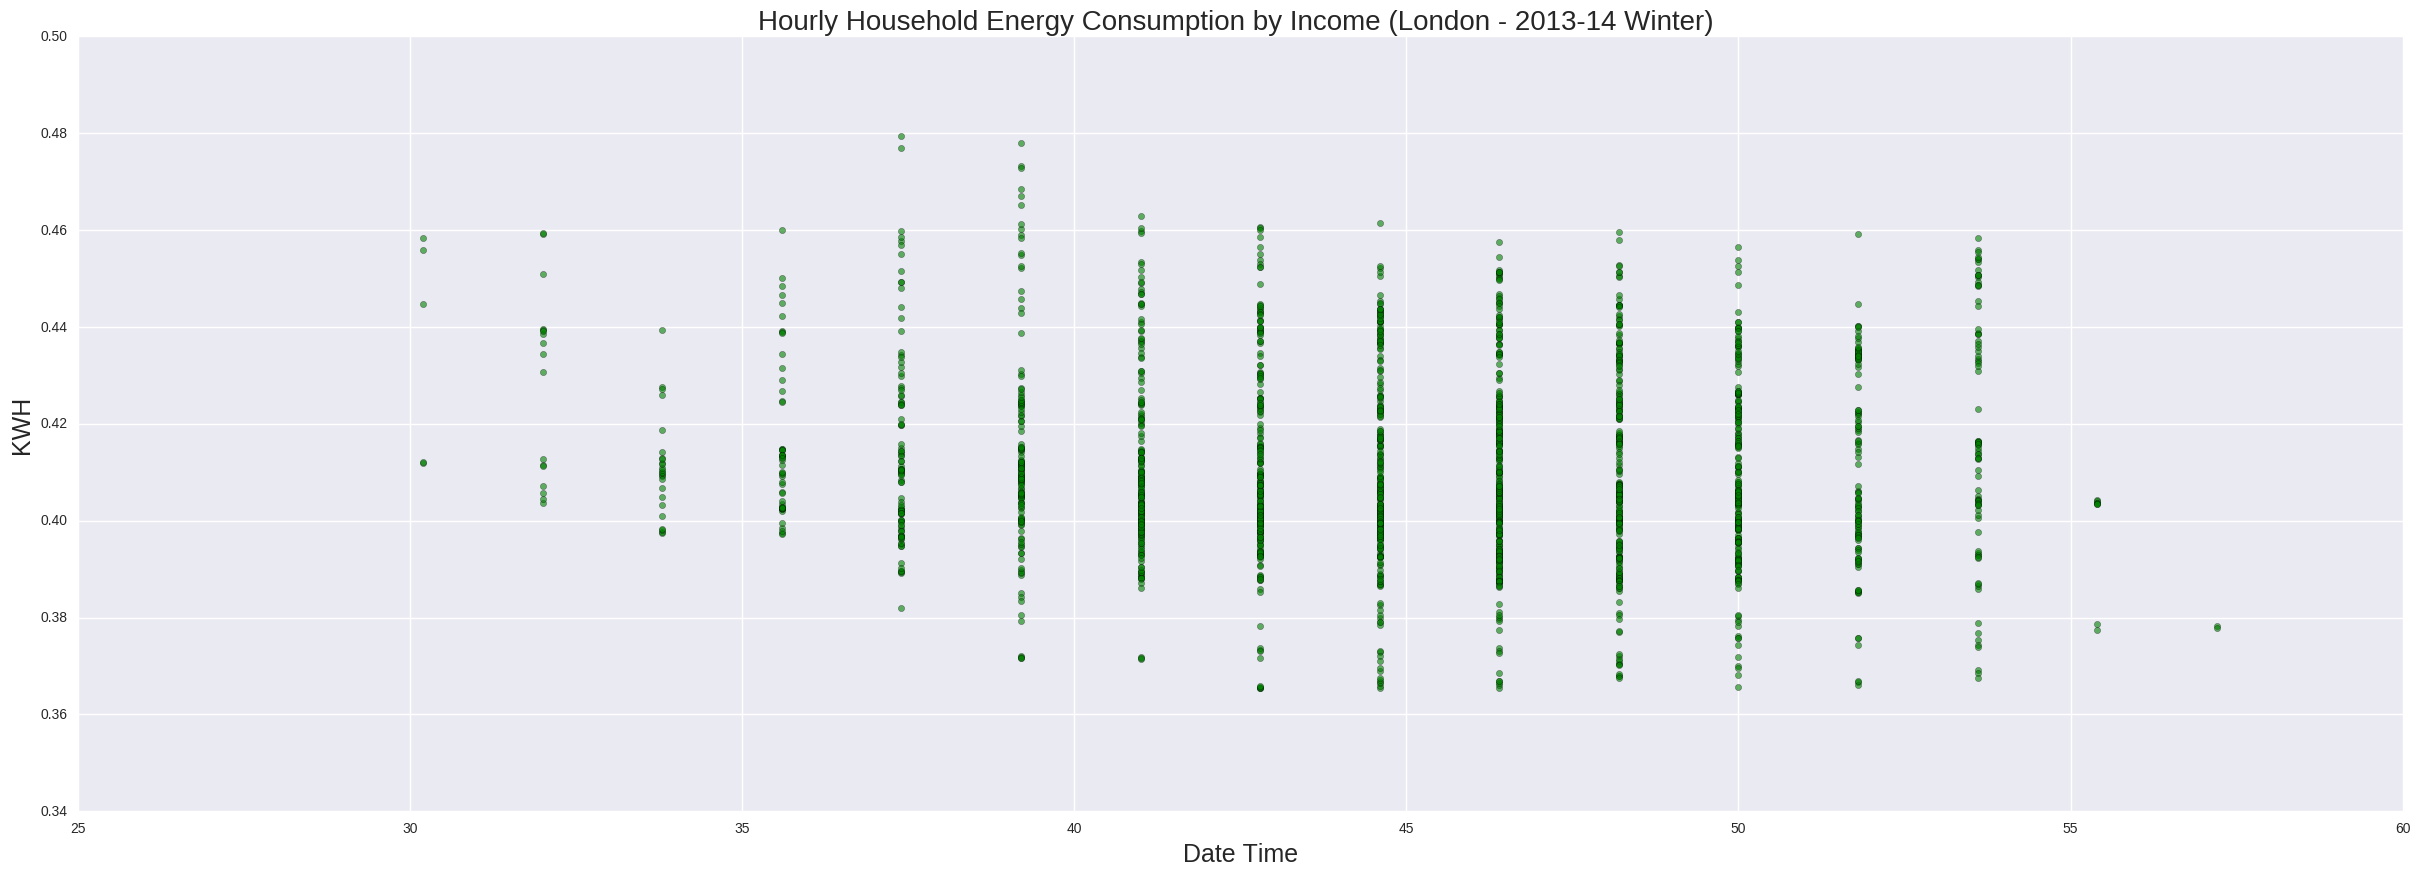

In [67]:
#plotting temperature vs low income energy trend
ax = pl.figure(figsize=(30,10)).add_subplot(111)
final2012_14.plot(kind='scatter', x='Temperature_F', y='LI_trend', color='Green',alpha=.6, ax=ax)
#final2012_14.plot(x='index', y='Temperature_F', color='black',alpha=.6, ax=ax)
pl.title('Hourly Household Energy Consumption by Income (London - 2013-14 Winter) ', fontsize=20)
pl.ylabel("KWH", fontsize=18)
pl.xlabel("Date Time", fontsize=18)

In [ ]:
## fourier analysis below

In [37]:
#cutting data
final2012_14_ = final2012_14.iloc[:200]
final2012_14_.drop('Wind_Speed_MPH', 1, inplace=True)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [38]:
final2012_14_

index  Dew_Point_F  Temperature_F  Low_Income  High_Income  \
0   2013-12-01 01:00:00         33.8           33.8    0.386444     0.479599   
1   2013-12-01 02:00:00         33.8           35.6    0.301773     0.381671   
2   2013-12-01 03:00:00         35.6           35.6    0.253057     0.335496   
3   2013-12-01 04:00:00         35.6           37.4    0.229611     0.312186   
4   2013-12-01 05:00:00         37.4           39.2    0.217060     0.305041   
5   2013-12-01 06:00:00         37.4           39.2    0.224744     0.325707   
6   2013-12-01 07:00:00         37.4           41.0    0.257580     0.371590   
7   2013-12-01 08:00:00         39.2           41.0    0.312774     0.473897   
8   2013-12-01 09:00:00         39.2           42.8    0.404882     0.625931   
9   2013-12-01 10:00:00         41.0           44.6    0.470331     0.685477   
10  2013-12-01 11:00:00         42.8           46.4    0.488635     0.705744   
11  2013-12-01 12:00:00         42.8           48.2    0.509109     0.701098   
12  2013-12-01 13:00:00         42.8           50.0    0.510081     0.726956   
13  2013-12-01 14:00:00         42.8           48.2    0.524822     0.752491   
14  2013-12-01 15:00:00         42.8           48.2    0.501308     0.708125   
15  2013-12-01 16:00:00         41.0           46.4    0.505158     0.710642   
16  2013-12-01 17:00:00         41.0           44.6    0.612842     0.894522   
17  2013-12-01 18:00:00         41.0           44.6    0.653707     1.047987   
18  2013-12-01 19:00:00         42.8           44.6    0.655094     1.121351   
19  2013-12-01 20:00:00         42.8           44.6    0.618435     1.113377   
20  2013-12-01 21:00:00         42.8           46.4    0.571675     0.968883   
21  2013-12-01 22:00:00         42.8           44.6    0.524154     0.885282   
22  2013-12-01 23:00:00         42.8           44.6    0.440100     0.734775   
23  2013-12-02 00:00:00         42.8           44.6    0.397325     0.540749   
24  2013-12-02 01:00:00         42.8           44.6    0.351083     0.406156   
25  2013-12-02 02:00:00         42.8           44.6    0.274224     0.333431   
26  2013-12-02 03:00:00         42.8           44.6    0.230204     0.306380   
27  2013-12-02 04:00:00         42.8           44.6    0.207940     0.303576   
28  2013-12-02 05:00:00         42.8           44.6    0.200631     0.301431   
29  2013-12-02 06:00:00         42.8           44.6    0.231491     0.330403   
..                  ...          ...            ...         ...          ...   
170 2013-12-08 03:00:00         41.0           42.8    0.256754     0.323995   
171 2013-12-08 04:00:00         39.2           41.0    0.231232     0.312252   
172 2013-12-08 05:00:00         41.0           42.8    0.220075     0.301715   
173 2013-12-08 06:00:00         41.0           42.8    0.210767     0.317083   
174 2013-12-08 07:00:00         41.0           42.8    0.246972     0.376227   
175 2013-12-08 08:00:00         41.0           44.6    0.306716     0.487918   
176 2013-12-08 09:00:00         42.8           46.4    0.405173     0.595138   
177 2013-12-08 10:00:00         42.8           46.4    0.481825     0.697720   
178 2013-12-08 11:00:00         44.6           50.0    0.460479     0.676118   
179 2013-12-08 12:00:00         44.6           51.8    0.470298     0.664395   
180 2013-12-08 13:00:00         44.6           53.6    0.490247     0.665281   
181 2013-12-08 14:00:00         44.6           51.8    0.505418     0.668849   
182 2013-12-08 15:00:00         46.4           51.8    0.496577     0.636084   
183 2013-12-08 16:00:00         44.6           50.0    0.506988     0.711035   
184 2013-12-08 17:00:00         44.6           48.2    0.610192     0.927111   
185 2013-12-08 18:00:00         44.6           48.2    0.675134     1.027605   
186 2013-12-08 19:00:00         44.6           48.2    0.654483     1.116700   
187 2013-12-08 20:00:00         44.6           48.2    0.614621     1.100836   
188 2013-12-08 21:

In [39]:
fourier = []
for column in final2012_14_:
    ft = np.abs(np.fft.rfft(final2012_14_[column]))
    fourier.append({'station_id': column, 'yr_periodicity_score': ft[4]})
    
df_ft = pd.DataFrame(fourier).sort_values(by='yr_periodicity_score', ascending=False)
(df_ft)

station_id  yr_periodicity_score
0          index          5.733350e+15
2  Temperature_F          1.415394e+02
1    Dew_Point_F          7.285038e+01
4    High_Income          2.736627e+00
5  Middle_Income          1.644355e+00
3     Low_Income          1.456327e+00

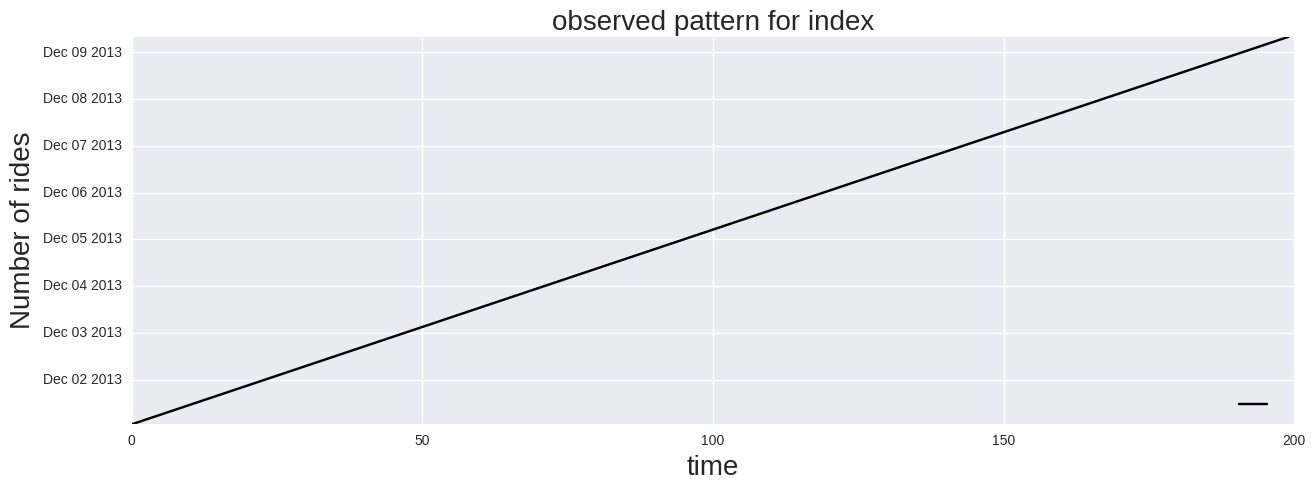

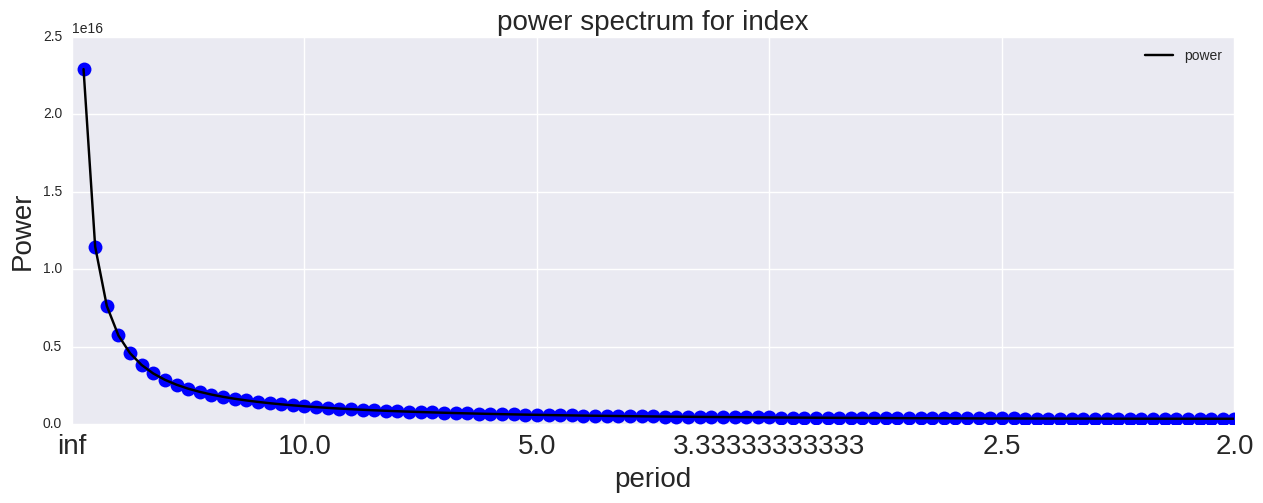

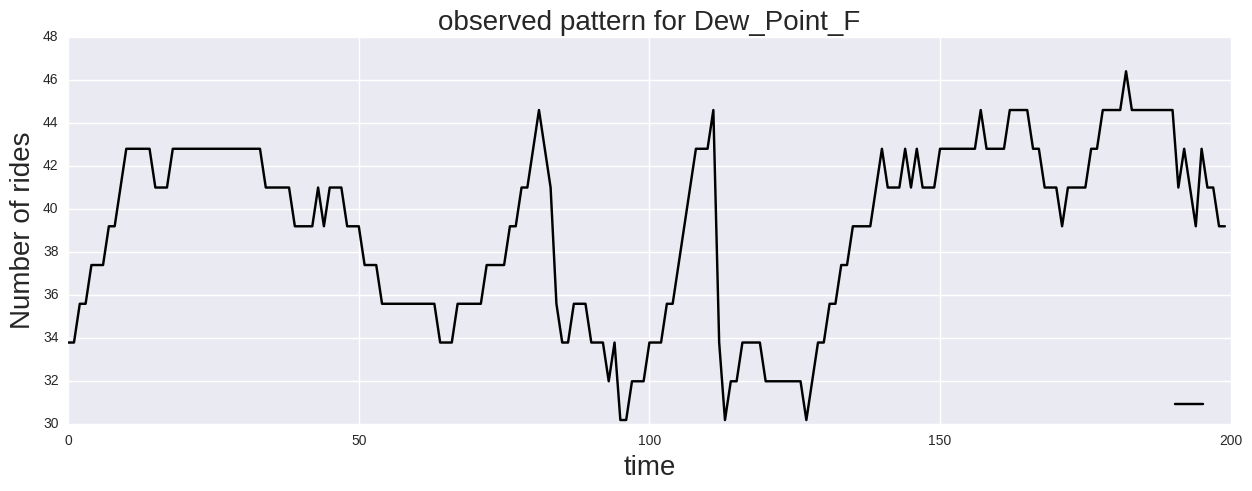

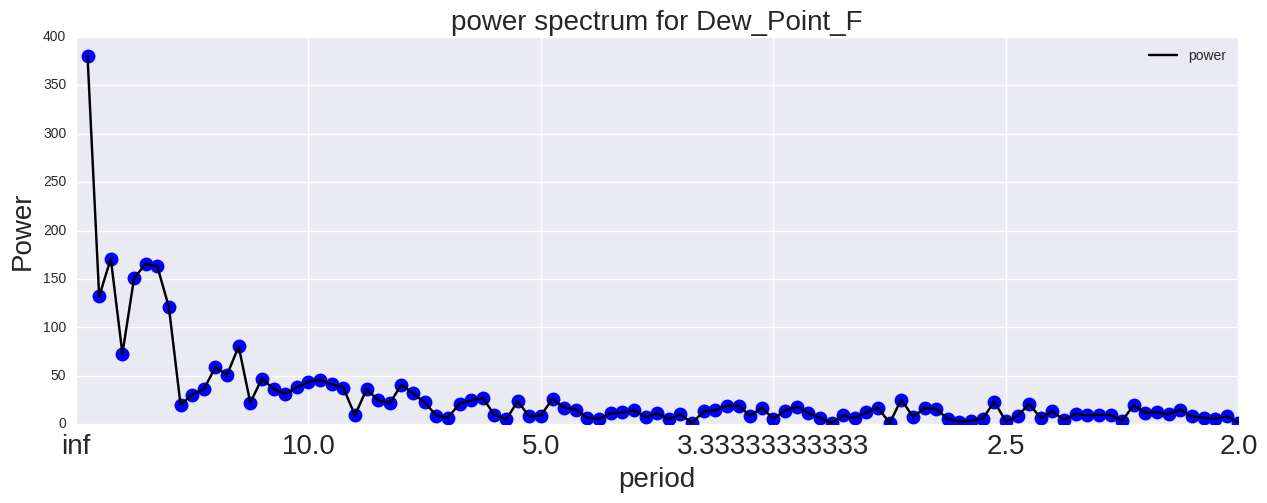

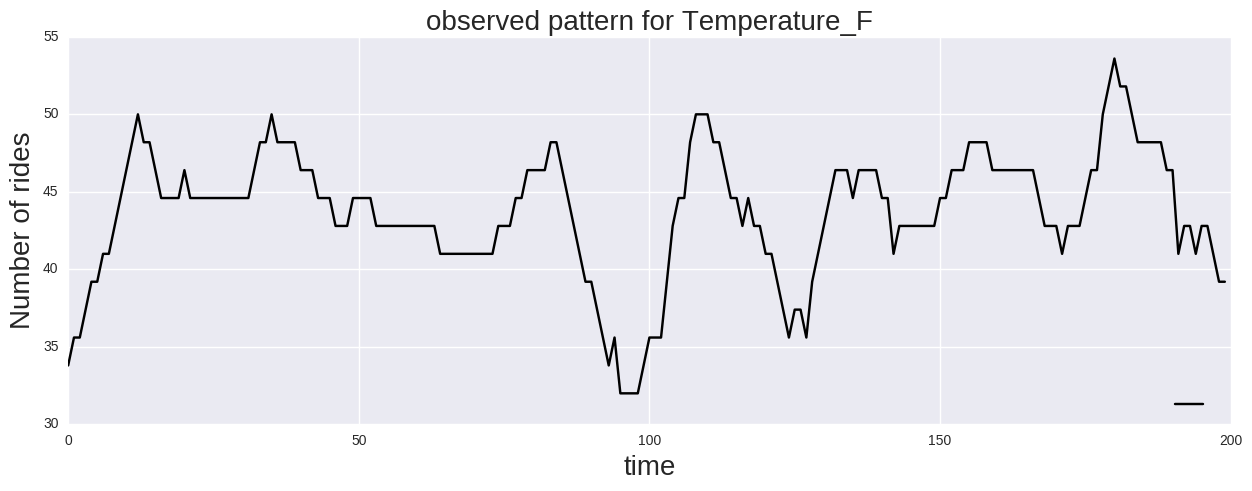

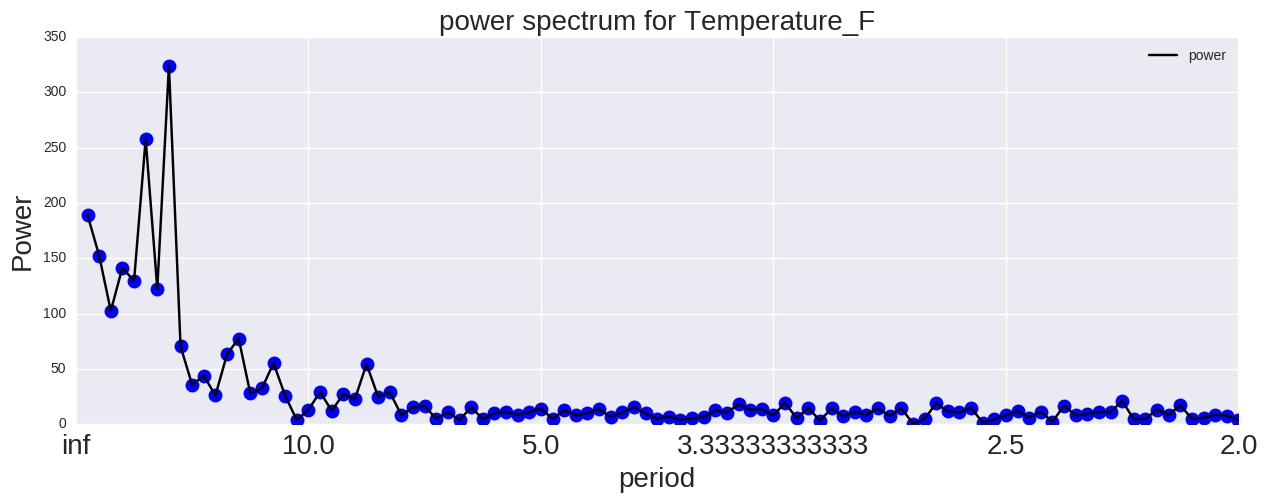

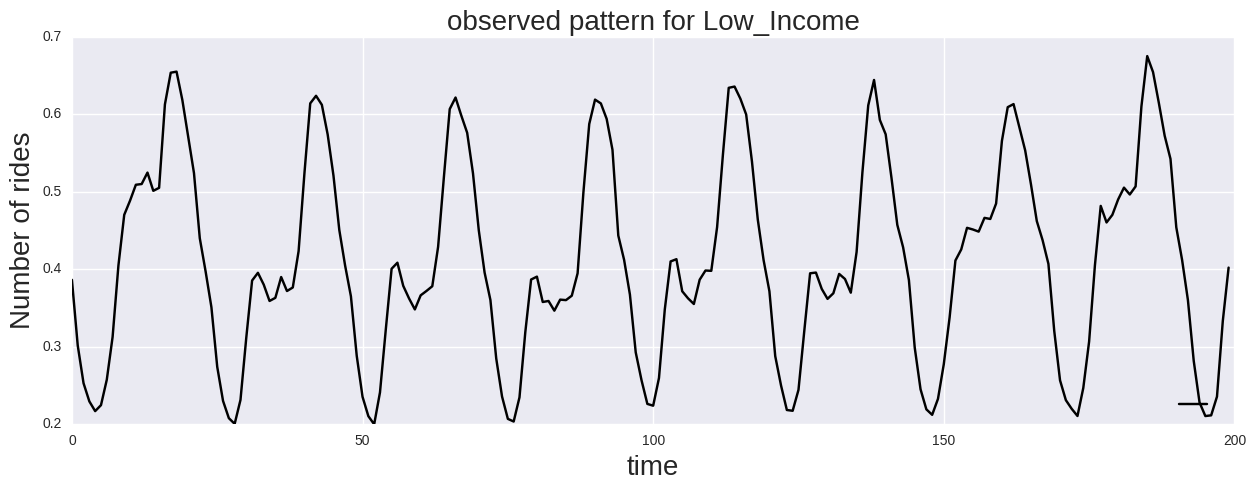

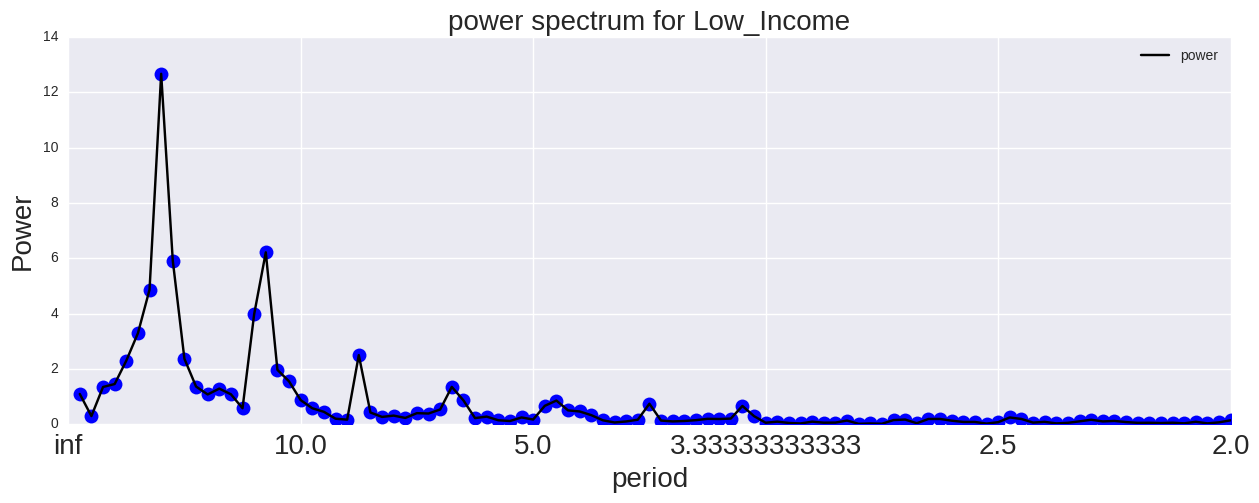

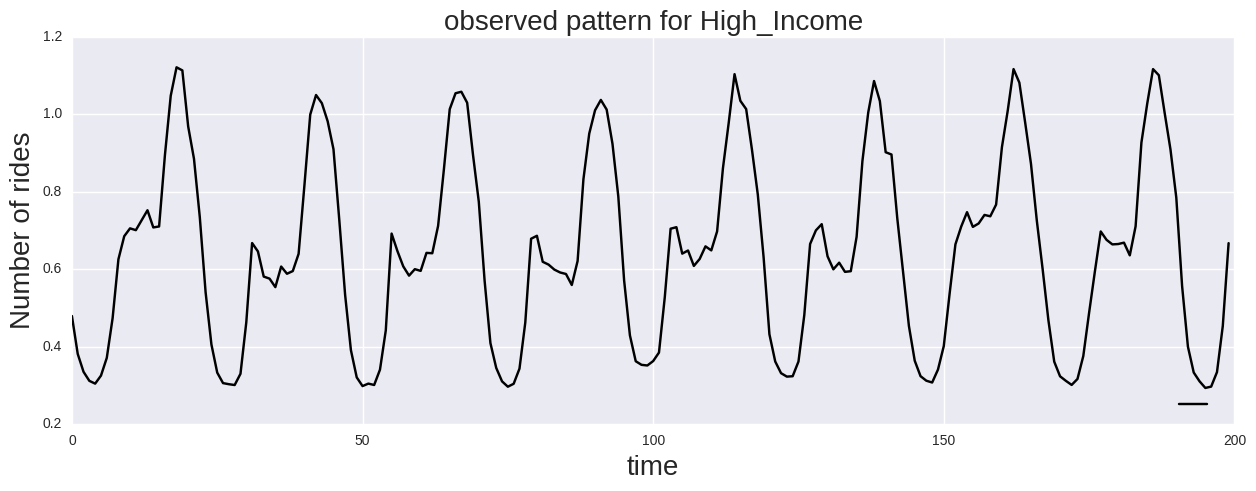

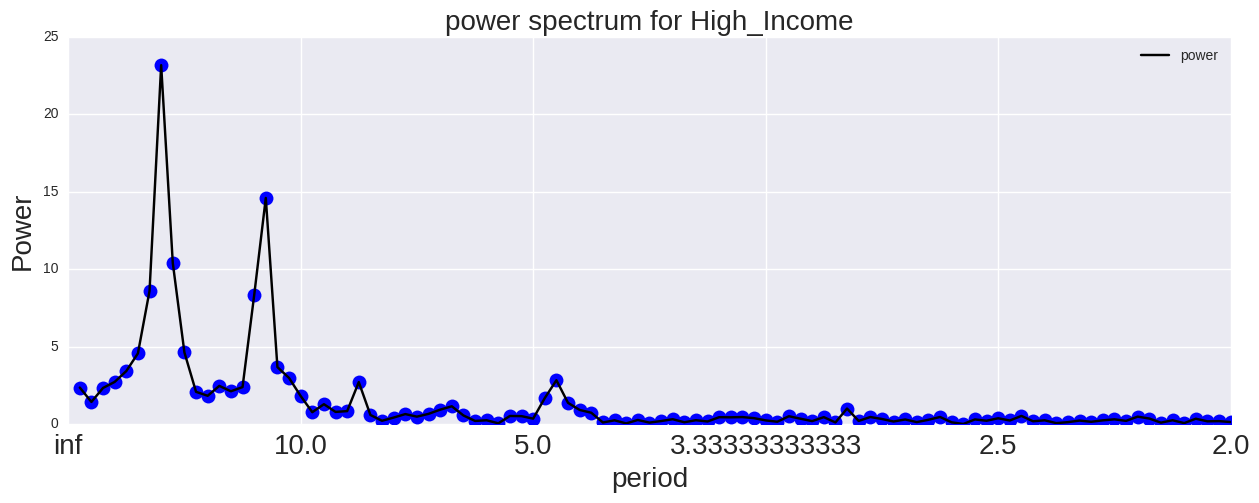

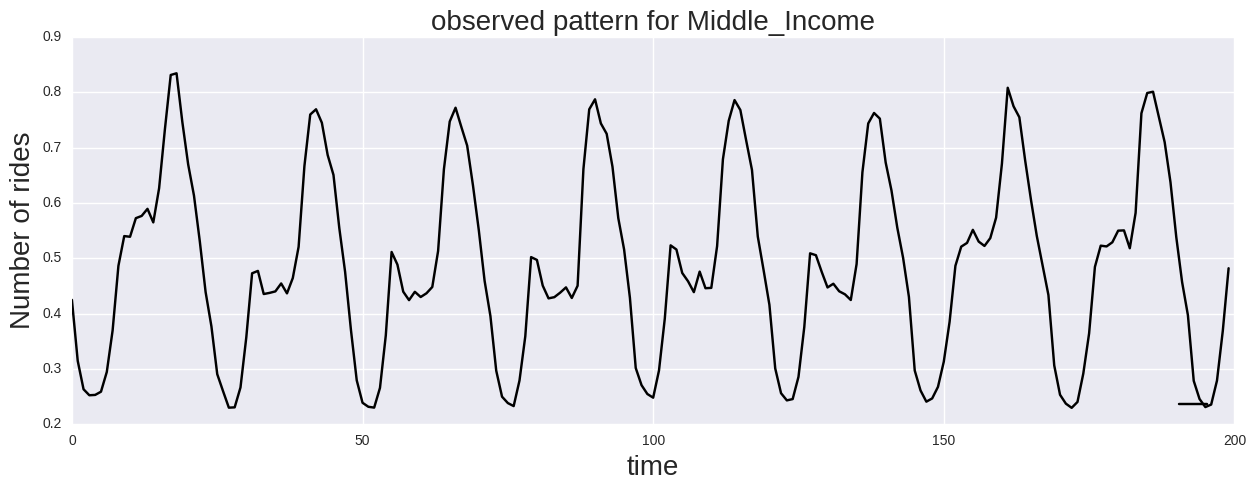

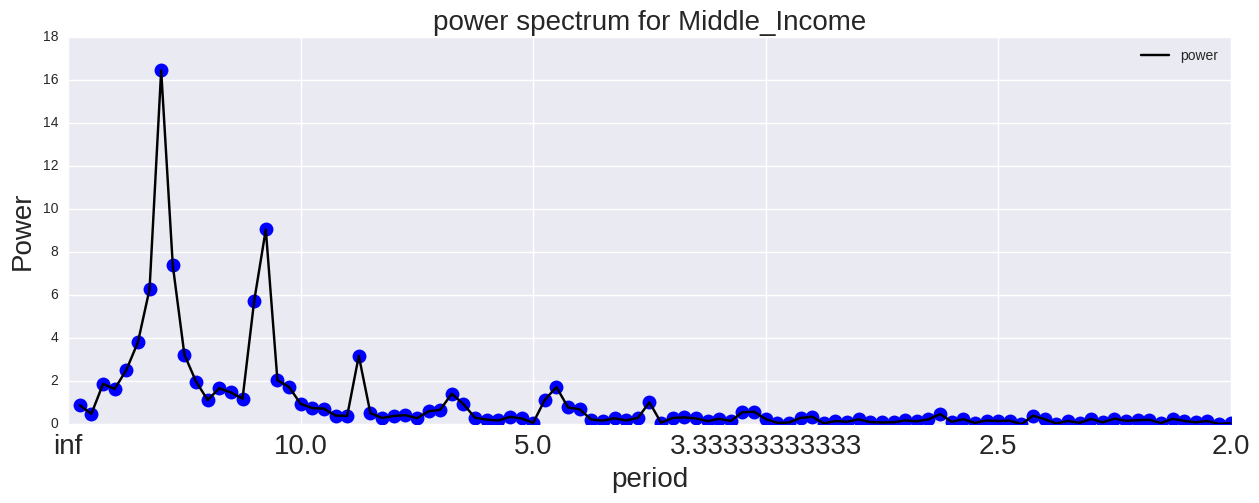

In [40]:
#plotting fourier results
for column in final2012_14_:
    ft = np.abs(np.fft.rfft(final2012_14_[column]))
    N = len(final2012_14_)
    # ploting rides
    fx = pl.figure(figsize=(15,5)).add_subplot(111)
    fx.plot(final2012_14_[column], color='black', label=' ')
    fx.set_title('observed pattern for %s'%(column), fontsize = 20)
    fx.set_ylabel("Number of rides", fontsize=20)
    fx.set_xlabel("time", fontsize=20)
    fx.legend(loc=4)
    # ploting power spectrum from furnier transformation
    ax=pl.figure(figsize=(15,5)).add_subplot(111)
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (ft[1:]), 'bo', ms=10)
    #ax.plot(np.fft.rfftfreq(N, 1.0)[4], (ft[4]), 'ro', ms=20, label='52nd week')
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (ft[1:]), color ='black', label = 'power')
    ax.get_xticks(minor=True)
    ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
    ax.legend(loc=1)
    pl.xlabel("period", fontsize=20)
    pl.ylabel("Power", fontsize=20)
    pl.title("power spectrum for %s"%(column), fontsize=20)